In [523]:
import pandas as pd
import numpy as np

## 데이터 로드

In [524]:
data = pd.read_csv('train.csv')

### 제외단지 제거

In [525]:
data = data.loc[(data['단지코드'] != 'C2085') & (data['단지코드'] != 'C1397') & (data['단지코드'] != 'C2431') & (data['단지코드'] != 'C1649') & (data['단지코드'] != 'C1036') & (data['단지코드'] != 'C2675')].reset_index(drop=True)
data = data.loc[(data['단지코드'] != 'C2335') & (data['단지코드'] != 'C1327') & (data['단지코드'] != 'C1095') & (data['단지코드'] != 'C2051') & (data['단지코드'] != 'C1218') & (data['단지코드'] != 'C1894') & (data['단지코드'] != 'C2483') & (data['단지코드'] != 'C1502') & (data['단지코드'] != 'C1988')].reset_index(drop=True)

### 장단기 구분 그룹핑

#### 초장기 ; 국민임대 30년 / 공공임대 50년 / 영구임대 50년 / 공공분양
#### 장기 ; 장기전세 20년 / 공공임대 10년 분납 / 공공임대 10년 / 
#### 단기 ; 행복주택 / 공공임대 5년 / 임대상가 10년

In [526]:
period = np.where((data.공급유형 == '국민임대')|(data.공급유형 == '공공임대(50년)')|(data.공급유형 == '영구임대')|(data.공급유형 == '공공분양'),
        'exL',
        np.where((data.공급유형 == '장기전세')|(data.공급유형 == '공공임대(분납)')|(data.공급유형 == '공공임대(10년)'),
                'L', 'S'))

data['period'] = period

### 전용면적 역시, 어느정도 그룹핑 필요

#### 5 단위로 끊고, 상한80 하한 10 넣어줌

In [527]:
data['전용면적'] = data['전용면적']//5*5

data['전용면적'].describe()

count    2869.000000
mean       41.856047
std        31.932425
min        10.000000
25%        30.000000
50%        35.000000
75%        50.000000
max       580.000000
Name: 전용면적, dtype: float64

In [528]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='전용면적', ylabel='Density'>

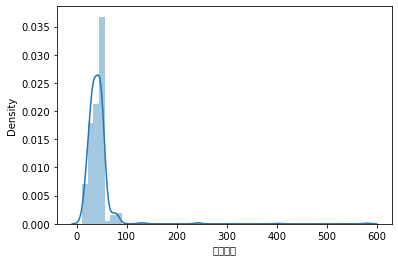

In [529]:
sns.distplot(data['전용면적'])

<AxesSubplot:xlabel='전용면적', ylabel='Density'>

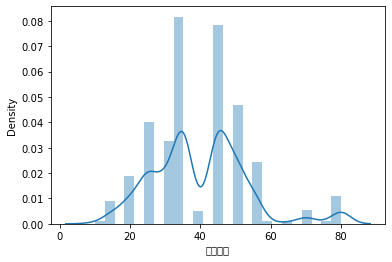

In [530]:
idx = data[data['전용면적']>80].index
data.loc[idx, '전용면적'] = 80

sns.distplot(data['전용면적'])

In [531]:
data.전용면적.describe()

count    2869.000000
mean       39.841408
std        13.502710
min        10.000000
25%        30.000000
50%        35.000000
75%        50.000000
max        80.000000
Name: 전용면적, dtype: float64

In [532]:
data.head(3)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,period
0,C2515,545,아파트,경상남도,국민임대,30.0,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0,exL
1,C2515,545,아파트,경상남도,국민임대,35.0,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0,exL
2,C2515,545,아파트,경상남도,국민임대,35.0,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0,exL


In [533]:
data.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수', 'period'],
      dtype='object')

In [534]:
data.groupby(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수', 'period']).sum()[['전용면적별세대수']].\
reset_index()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,period,전용면적별세대수
0,C1000,566,아파트,충청북도,국민임대,35.0,10.0,A,10803000,96030,0.0,1.0,438.0,481.0,exL,419
1,C1000,566,아파트,충청북도,국민임대,45.0,10.0,A,14404000,129640,0.0,1.0,438.0,481.0,exL,72
2,C1000,566,아파트,충청북도,국민임대,50.0,10.0,A,15604000,150040,0.0,1.0,438.0,481.0,exL,75
3,C1013,1308,아파트,광주광역시,국민임대,35.0,16.0,A,20770000,108900,0.0,6.0,1119.0,1665.0,exL,291
4,C1013,1308,아파트,광주광역시,국민임대,45.0,16.0,A,24665000,135960,0.0,6.0,1119.0,1665.0,exL,757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,C2680,758,아파트,경상남도,국민임대,35.0,19.0,A,20233000,98630,0.0,7.0,564.0,590.0,exL,486
1171,C2680,758,아파트,경상남도,국민임대,45.0,19.0,A,25293000,145410,0.0,7.0,564.0,590.0,exL,272
1172,C2692,499,아파트,경상북도,국민임대,35.0,19.0,A,10242000,82600,0.0,2.0,409.0,437.0,exL,334
1173,C2692,499,아파트,경상북도,국민임대,45.0,19.0,A,18173000,132170,0.0,2.0,409.0,437.0,exL,105


## 단지코드 - 임대건물구분 매핑

In [535]:
df1 = pd.DataFrame(data.groupby('단지코드').sum()['전용면적별세대수'].reset_index()['단지코드'], columns = ['단지코드'])
temp = data.groupby(['단지코드', '임대건물구분']).sum()['전용면적별세대수'].reset_index()

df1 = df1.merge(temp.loc[temp['임대건물구분'] == '아파트'].reset_index(drop=True)[['단지코드','전용면적별세대수']], on = '단지코드', how = 'left')

df1.columns = ['단지코드','아파트세대수']

df1 = df1.merge(temp.loc[temp['임대건물구분'] == '상가'].reset_index(drop=True)[['단지코드','전용면적별세대수']], on = '단지코드', how = 'left' )

df1.columns = ['단지코드','아파트세대수', '상가세대수']

df1 = df1.fillna(0)

### 총세대수 처리

In [536]:
temp = data[['단지코드', '총세대수']].drop_duplicates()
df1 = temp.merge(df1, on = '단지코드', how = 'left')

In [537]:
df1['세대수합차이'] = df1['총세대수'] - df1['아파트세대수'] - df1['상가세대수']
df1['상가세대수'] = np.where((df1['세대수합차이'] != 0) & (df1['세대수합차이'] <= 14),
                       df1['상가세대수']+df1['세대수합차이'], df1['상가세대수'])

In [538]:
bigdif = ['C1490', 'C2497', 'C2620', 'C1344', 
          'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']

In [539]:
df1['상가비율'] = df1['상가세대수']/df1['총세대수']
df1['아파트비율'] = df1['아파트세대수']/df1['총세대수']

df1.loc[df1['세대수합차이'] == 0].mean(), df1.loc[df1['단지코드'].isin(bigdif)].mean()

(총세대수      730.284182
 아파트세대수    728.823056
 상가세대수       1.461126
 세대수합차이      0.000000
 상가비율        0.001542
 아파트비율       0.998458
 dtype: float64,
 총세대수      681.555556
 아파트세대수    444.333333
 상가세대수       1.111111
 세대수합차이    236.111111
 상가비율        0.001472
 아파트비율       0.617735
 dtype: float64)

### 부족치 대부분이 아파트임을 비율상 유추할 수 있다. 따라서 아파트로 채움

In [540]:
df1['아파트세대수'] = np.where(df1['세대수합차이']>0, df1['아파트세대수']+df1['세대수합차이'],
                        df1['아파트세대수'])

In [541]:
df1.drop(['세대수합차이', '상가비율','아파트비율'], axis = 1, inplace = True)

## 단지코드 - 기본정보 매핑


#### 제외 : 임대건물구분(df1), 전용면적별세대수, 전용면적, 공급유형, 자격유형
#### 포함 : 총세대수(이미포함), 단지코드, 지역, 공가수, 도보 10분거리 내 지하철역 수(환승노선 수 반영),  도보 10분거리 내 버스정류장 수, 단지내주차면수, 등록차량수

In [542]:
temp = data[['단지코드', '지역', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', \
                     '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']].drop_duplicates()


df1 = df1.merge(temp, on = '단지코드', how='left')

### 도보 10분거리 내 지하철역 수(환승노선 수 반영) 결측 처리

#### 지하철 역 수는 해당 지역 평균을 찾아보자

In [543]:
df1.loc[df1['지역'] == '충청남도'].mean()

총세대수                            557.473684
아파트세대수                          553.473684
상가세대수                             4.210526
공가수                               8.578947
도보 10분거리 내 지하철역 수(환승노선 수 반영)      0.000000
도보 10분거리 내 버스정류장 수                3.368421
단지내주차면수                         332.842105
등록차량수                           288.526316
dtype: float64

In [544]:
df1.loc[df1['지역'] == '대전광역시'].mean()

총세대수                            1024.960000
아파트세대수                          1020.440000
상가세대수                              5.120000
공가수                               11.520000
도보 10분거리 내 지하철역 수(환승노선 수 반영)       0.588235
도보 10분거리 내 버스정류장 수                 4.720000
단지내주차면수                          745.280000
등록차량수                            647.040000
dtype: float64

#### 충남 다 0이니 걍 0으로

#### 대전광역시 17개 중 10곳이 1, 따라서 0혹은 1로 대체해도 무방

#### 충남 0, 대전 1로 가자

In [545]:
df1['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = np.where(
    (df1['지역']=='충청남도')&(df1['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()),
    0,
    df1['도보 10분거리 내 지하철역 수(환승노선 수 반영)']
)
df1['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = np.where(
    (df1['지역']=='대전광역시')&(df1['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()),
    1,
    df1['도보 10분거리 내 지하철역 수(환승노선 수 반영)']
)

df1.loc[df1['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]

,단지코드,총세대수,아파트세대수,상가세대수,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수


## 자격유형 / 공급유형 ; 

#### 공급유형
#### 1)단지코드 - 공급유형cat

In [546]:
temp = data.groupby(['단지코드', 'period']).sum().reset_index()

temp1 = temp.loc[temp['period'] == 'exL'][['단지코드', '전용면적별세대수']]
temp1.columns = ['단지코드', '초장기세대수']
df1 = df1.merge(temp1, on = '단지코드', how = 'left')

temp2 = temp.loc[temp['period'] == 'L'][['단지코드', '전용면적별세대수']]
temp2.columns = ['단지코드', '장기세대수']
df1 = df1.merge(temp2, on = '단지코드', how = 'left')

temp1 = temp.loc[temp['period'] == 'S'][['단지코드', '전용면적별세대수']]
temp1.columns = ['단지코드', '단기세대수']
df1 = df1.merge(temp1, on = '단지코드', how = 'left')

df1 = df1.fillna(0)

#### 2)공급유형 cat 여부 컬럼 ★

In [547]:
df3 = pd.DataFrame(df1.단지코드)
temp = data.groupby(['단지코드', 'period']).sum().reset_index() #단지코드-period별 데이터
for i in data.period.unique():
    temp1 = temp[temp.period == i]
    temp1['공급유형_{}'.format(i)] =1
    temp1 = temp1[['단지코드', '공급유형_{}'.format(i)]]
    df3 = df3.merge(temp1, on='단지코드', how='left')

In [548]:
df3 = df3.fillna(0)
df1 = df1.merge(df3, on='단지코드', how='left')

#### 3)단지코드 - 공급유형

In [549]:
for i in data.공급유형.unique():
    temp = data[data.공급유형 ==i].groupby('단지코드').sum().reset_index()[['단지코드', '전용면적별세대수']]
    temp.columns = ['단지코드', '{}_세대수'.format(i)]
    df1 = df1.merge(temp,on='단지코드', how='left')

In [550]:
df1 = df1.fillna(0)

## 자격유형

#### 단지코드 - 자격유형cat

In [551]:
ls=[]
for i in data.공급유형.unique():
    temp = data[data.공급유형 == i]
    cert = temp.자격유형.unique()
    ls.append([i, cert])
    
pd.DataFrame(ls)

,0,1
0,국민임대,"[A, B, E, G, H]"
1,공공임대(50년),[A]
2,영구임대,"[C, E, F, I, A]"
3,임대상가,[D]
4,공공임대(10년),[A]
5,공공임대(분납),[A]
6,장기전세,[A]
7,공공분양,[D]
8,행복주택,"[J, K, L, M, N, O]"
9,공공임대(5년),[A]


- A : 공공임대(50년), 공공임대(10년), 공공임대(분납), 장기전세, 공공임대(5년) - 
- D : 임대상가, 공공분양 - 
- A, C, E, F, I : 영구임대
- J, K, L, M, N, O : 행복주택
- A, B, E, G, H : 국민임대

In [552]:
data['자격유형_cat'] = np.where(data.공급유형 =='행복주택', 'JKLMNO',
        np.where(data.공급유형 == '국민임대', 'ABEGH',
                np.where(data.공급유형 =='영구임대', 'ACEFI',
                        np.where((data.공급유형 =='임대상가') | (data.공급유형 =='공공분양'), 'D', 'A'))))

In [553]:
for i in data['자격유형_cat'].unique():
    temp = data[data.자격유형_cat ==i].groupby('단지코드').sum().reset_index()[['단지코드', '전용면적별세대수']]
    temp.columns = ['단지코드', '{}_세대수'.format(i)]
    df1 = df1.merge(temp,on='단지코드', how='left')
    
df1 = df1.fillna(0)

In [554]:
data['자격유형_cat'].unique()

array(['ABEGH', 'A', 'ACEFI', 'D', 'JKLMNO'], dtype=object)

### 전용면적 그룹
- 상한선 80, 하한선 10
- 구간 10으로
- 이미 그룹핑해둠

In [555]:
data.전용면적 = data.전용면적.astype('int64')

data.전용면적 = np.where(data.전용면적 == 0, 10, data.전용면적)

In [556]:
for i in data.sort_values('전용면적').전용면적.unique():
    temp = data[data.전용면적 ==i].groupby('단지코드').sum().reset_index()[['단지코드', '전용면적별세대수']]
    temp.columns = ['단지코드', '전용면적_{}_세대수'.format(i)]
    df1 = df1.merge(temp,on='단지코드', how='left')
df1 = df1.fillna(0)

In [557]:
data.loc[data.전용면적 == 0]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,period,자격유형_cat


## 아파트/상가 여부 칼럼

In [558]:
df2 = pd.DataFrame(data.groupby('단지코드').sum().reset_index()['단지코드'], columns=['단지코드']) #단지코드 데이터프레임
temp = data.groupby(['단지코드', '임대건물구분']).sum().reset_index() #단지코드-임대건물구분별 데이터프레임
#아파트
apart = temp[temp.임대건물구분 =='아파트'] 
apart['임대건물구분_아파트'] = 1
apart = apart[['단지코드', '임대건물구분_아파트']]
#상가
store = temp[temp.임대건물구분=='상가']
store['임대건물구분_상가'] =1
store = store[['단지코드', '임대건물구분_상가']]
#merge
df2 = df2.merge(apart, on='단지코드', how='left')
df2 = df2.merge(store, on='단지코드', how='left')
df2 = df2.fillna(0)
df2.임대건물구분_상가= df2.임대건물구분_상가.astype('int64')
#df1 - df2 merge
df1 = df1.merge(df2, on='단지코드', how='left')

In [559]:
df1.columns

Index(['단지코드', '총세대수', '아파트세대수', '상가세대수', '지역', '공가수',
       '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
       '등록차량수', '초장기세대수', '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L',
       '국민임대_세대수', '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_15_세대수', '전용면적_20_세대수', '전용면적_25_세대수', '전용면적_30_세대수',
       '전용면적_35_세대수', '전용면적_40_세대수', '전용면적_45_세대수', '전용면적_50_세대수',
       '전용면적_55_세대수', '전용면적_60_세대수', '전용면적_65_세대수', '전용면적_70_세대수',
       '전용면적_75_세대수', '전용면적_80_세대수', '임대건물구분_아파트', '임대건물구분_상가'],
      dtype='object')

In [560]:
df1.shape

(411, 48)

# Test set 시 필요

df1['공공임대(5년)_세대수'] = 0
df1['장기전세_세대수'] = 0
df1['공공분양_세대수'] = 0

df1.shape

In [561]:
df1.columns

Index(['단지코드', '총세대수', '아파트세대수', '상가세대수', '지역', '공가수',
       '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
       '등록차량수', '초장기세대수', '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L',
       '국민임대_세대수', '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_15_세대수', '전용면적_20_세대수', '전용면적_25_세대수', '전용면적_30_세대수',
       '전용면적_35_세대수', '전용면적_40_세대수', '전용면적_45_세대수', '전용면적_50_세대수',
       '전용면적_55_세대수', '전용면적_60_세대수', '전용면적_65_세대수', '전용면적_70_세대수',
       '전용면적_75_세대수', '전용면적_80_세대수', '임대건물구분_아파트', '임대건물구분_상가'],
      dtype='object')

len(['단지코드', '총세대수', '아파트세대수', '상가세대수', '지역', '공가수',
       '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
       '초장기세대수', '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L',
       '국민임대_세대수', '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_20_세대수', '전용면적_30_세대수', '전용면적_40_세대수', '전용면적_50_세대수',
       '전용면적_60_세대수', '전용면적_70_세대수', '전용면적_80_세대수', '임대건물구분_아파트', '임대건물구분_상가'])

df1 = df1[['단지코드', '총세대수', '아파트세대수', '상가세대수', '지역', '공가수',
       '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
       '초장기세대수', '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L',
       '국민임대_세대수', '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_20_세대수', '전용면적_30_세대수', '전용면적_40_세대수', '전용면적_50_세대수',
       '전용면적_60_세대수', '전용면적_70_세대수', '전용면적_80_세대수', '임대건물구분_아파트', '임대건물구분_상가']]

In [562]:
temp = df1[['단지코드', '총세대수', '아파트세대수', '상가세대수',
       '초장기세대수', '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L', '국민임대_세대수',
       '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_15_세대수', '전용면적_20_세대수', '전용면적_25_세대수', '전용면적_30_세대수',
       '전용면적_35_세대수', '전용면적_40_세대수', '전용면적_45_세대수', '전용면적_50_세대수',
       '전용면적_55_세대수', '전용면적_60_세대수', '전용면적_65_세대수', '전용면적_70_세대수',
       '전용면적_75_세대수', '전용면적_80_세대수']]

temp

,단지코드,총세대수,아파트세대수,상가세대수,초장기세대수,장기세대수,단기세대수,공급유형_exL,공급유형_S,공급유형_L,국민임대_세대수,공공임대(50년)_세대수,영구임대_세대수,임대상가_세대수,공공임대(10년)_세대수,공공임대(분납)_세대수,장기전세_세대수,공공분양_세대수,행복주택_세대수,공공임대(5년)_세대수,ABEGH_세대수,A_세대수,ACEFI_세대수,D_세대수,JKLMNO_세대수,전용면적_10_세대수,전용면적_15_세대수,전용면적_20_세대수,전용면적_25_세대수,전용면적_30_세대수,전용면적_35_세대수,전용면적_40_세대수,전용면적_45_세대수,전용면적_50_세대수,전용면적_55_세대수,전용면적_60_세대수,전용면적_65_세대수,전용면적_70_세대수,전용면적_75_세대수,전용면적_80_세대수
0,C2515,545,545.0,0.0,545.0,0.0,0.0,1.0,0.0,0.0,545.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,276.0,80.0,0.0,57.0,132.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C1407,1216,1216.0,0.0,1216.0,0.0,0.0,1.0,0.0,0.0,1216.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1216.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,390.0,0.0,362.0,340.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C1945,755,755.0,0.0,755.0,0.0,0.0,1.0,0.0,0.0,755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240.0,0.0,0.0,303.0,212.0,0.0,0.0,0.0,0.0,0.0
3,C1470,696,696.0,0.0,696.0,0.0,0.0,1.0,0.0,0.0,696.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,696.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.0,0.0,196.0,246.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C1898,566,566.0,0.0,566.0,0.0,0.0,1.0,0.0,0.0,566.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,566.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,271.0,0.0,209.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,C2586,90,90.0,0.0,0.0,0.0,90.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,12.0,0.0,42.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
407,C2035,492,492.0,0.0,492.0,0.0,0.0,1.0,0.0,0.0,492.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,492.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,156.0,0.0,156.0,0.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408,C2020,40,40.0,0.0,0.0,0.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,20.0,0.0,5.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
409,C2437,90,90.0,0.0,90.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 '공급유형_exL', '공급유형_S', '공급유형_L',
       '국민임대_세대수', '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_15_세대수', '전용면적_20_세대수', '전용면적_25_세대수', '전용면적_30_세대수',
       '전용면적_35_세대수', '전용면적_40_세대수', '전용면적_45_세대수', '전용면적_50_세대수',
       '전용면적_55_세대수', '전용면적_60_세대수', '전용면적_65_세대수', '전용면적_70_세대수',
       '전용면적_75_세대수', '전용면적_80_세대수'

In [563]:
temp['초장기세대수_비율'] = temp['초장기세대수'] / (temp['초장기세대수'] + temp['장기세대수'] + temp['단기세대수'])
temp['장기세대수_비율'] = temp['장기세대수'] / (temp['초장기세대수'] + temp['장기세대수'] + temp['단기세대수'])
temp['단기세대수_비율'] = temp['단기세대수'] / (temp['초장기세대수'] + temp['장기세대수'] + temp['단기세대수'])

 '공급유형_exL', '공급유형_S', '공급유형_L',

In [564]:
temp['공급유형_exL_비율'] = temp['공급유형_exL'] / (temp['공급유형_exL'] + temp['공급유형_S'] + temp['공급유형_L'])
temp['공급유형_S_비율'] = temp['공급유형_S'] / (temp['공급유형_exL'] + temp['공급유형_S'] + temp['공급유형_L'])
temp['공급유형_L_비율'] = temp['공급유형_L'] / (temp['공급유형_exL'] + temp['공급유형_S'] + temp['공급유형_L'])

'국민임대_세대수', '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',

In [565]:
temp['국민임대_비율'] = temp['국민임대_세대수'] / \
                            (temp['국민임대_세대수'] + temp['공공임대(50년)_세대수'] + temp['영구임대_세대수'] +\
                            temp['임대상가_세대수'] + temp['공공임대(10년)_세대수'] + temp['공공임대(분납)_세대수'] +\
                            temp['장기전세_세대수'] + temp['공공분양_세대수'] + temp['행복주택_세대수'] +\
                            temp['공공임대(5년)_세대수'])


temp['공공임대(50년)_비율'] = temp['공공임대(50년)_세대수'] / \
                            (temp['국민임대_세대수'] + temp['공공임대(50년)_세대수'] + temp['영구임대_세대수'] +\
                            temp['임대상가_세대수'] + temp['공공임대(10년)_세대수'] + temp['공공임대(분납)_세대수'] +\
                            temp['장기전세_세대수'] + temp['공공분양_세대수'] + temp['행복주택_세대수'] +\
                            temp['공공임대(5년)_세대수'])


temp['영구임대_비율'] = temp['영구임대_세대수'] / \
                            (temp['국민임대_세대수'] + temp['공공임대(50년)_세대수'] + temp['영구임대_세대수'] +\
                            temp['임대상가_세대수'] + temp['공공임대(10년)_세대수'] + temp['공공임대(분납)_세대수'] +\
                            temp['장기전세_세대수'] + temp['공공분양_세대수'] + temp['행복주택_세대수'] +\
                            temp['공공임대(5년)_세대수'])


temp['임대상가_비율'] = temp['임대상가_세대수'] / \
                            (temp['국민임대_세대수'] + temp['공공임대(50년)_세대수'] + temp['영구임대_세대수'] +\
                            temp['임대상가_세대수'] + temp['공공임대(10년)_세대수'] + temp['공공임대(분납)_세대수'] +\
                            temp['장기전세_세대수'] + temp['공공분양_세대수'] + temp['행복주택_세대수'] +\
                            temp['공공임대(5년)_세대수'])


temp['공공임대(10년)_비율'] = temp['공공임대(10년)_세대수'] / \
                            (temp['국민임대_세대수'] + temp['공공임대(50년)_세대수'] + temp['영구임대_세대수'] +\
                            temp['임대상가_세대수'] + temp['공공임대(10년)_세대수'] + temp['공공임대(분납)_세대수'] +\
                            temp['장기전세_세대수'] + temp['공공분양_세대수'] + temp['행복주택_세대수'] +\
                            temp['공공임대(5년)_세대수'])


temp['공공임대(분납)_비율'] = temp['공공임대(분납)_세대수'] / \
                            (temp['국민임대_세대수'] + temp['공공임대(50년)_세대수'] + temp['영구임대_세대수'] +\
                            temp['임대상가_세대수'] + temp['공공임대(10년)_세대수'] + temp['공공임대(분납)_세대수'] +\
                            temp['장기전세_세대수'] + temp['공공분양_세대수'] + temp['행복주택_세대수'] +\
                            temp['공공임대(5년)_세대수'])


temp['장기전세_비율'] = temp['장기전세_세대수'] / \
                            (temp['국민임대_세대수'] + temp['공공임대(50년)_세대수'] + temp['영구임대_세대수'] +\
                            temp['임대상가_세대수'] + temp['공공임대(10년)_세대수'] + temp['공공임대(분납)_세대수'] +\
                            temp['장기전세_세대수'] + temp['공공분양_세대수'] + temp['행복주택_세대수'] +\
                            temp['공공임대(5년)_세대수'])


temp['공공분양_비율'] = temp['공공분양_세대수'] / \
                            (temp['국민임대_세대수'] + temp['공공임대(50년)_세대수'] + temp['영구임대_세대수'] +\
                            temp['임대상가_세대수'] + temp['공공임대(10년)_세대수'] + temp['공공임대(분납)_세대수'] +\
                            temp['장기전세_세대수'] + temp['공공분양_세대수'] + temp['행복주택_세대수'] +\
                            temp['공공임대(5년)_세대수'])


temp['행복주택_비율'] = temp['행복주택_세대수'] / \
                            (temp['국민임대_세대수'] + temp['공공임대(50년)_세대수'] + temp['영구임대_세대수'] +\
                            temp['임대상가_세대수'] + temp['공공임대(10년)_세대수'] + temp['공공임대(분납)_세대수'] +\
                            temp['장기전세_세대수'] + temp['공공분양_세대수'] + temp['행복주택_세대수'] +\
                            temp['공공임대(5년)_세대수'])


temp['공공임대(5년)_비율'] = temp['공공임대(5년)_세대수'] / \
                            (temp['국민임대_세대수'] + temp['공공임대(50년)_세대수'] + temp['영구임대_세대수'] +\
                            temp['임대상가_세대수'] + temp['공공임대(10년)_세대수'] + temp['공공임대(분납)_세대수'] +\
                            temp['장기전세_세대수'] + temp['공공분양_세대수'] + temp['행복주택_세대수'] +\
                            temp['공공임대(5년)_세대수'])

'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수'

In [566]:
temp['ABEGH_비율'] = temp['ABEGH_세대수'] / \
(temp['ABEGH_세대수'] + temp['A_세대수'] + temp['ACEFI_세대수'] + temp['D_세대수'] + temp['JKLMNO_세대수'])

temp['A_비율'] = temp['A_세대수'] / \
(temp['ABEGH_세대수'] + temp['A_세대수'] + temp['ACEFI_세대수'] + temp['D_세대수'] + temp['JKLMNO_세대수'])


temp['ACEFI_비율'] = temp['ACEFI_세대수'] / \
(temp['ABEGH_세대수'] + temp['A_세대수'] + temp['ACEFI_세대수'] + temp['D_세대수'] + temp['JKLMNO_세대수'])


temp['D_비율'] = temp['D_세대수'] / \
(temp['ABEGH_세대수'] + temp['A_세대수'] + temp['ACEFI_세대수'] + temp['D_세대수'] + temp['JKLMNO_세대수'])


temp['JKLMNO_비율'] = temp['JKLMNO_세대수'] / \
(temp['ABEGH_세대수'] + temp['A_세대수'] + temp['ACEFI_세대수'] + temp['D_세대수'] + temp['JKLMNO_세대수'])


'전용면적_10_세대수',
       '전용면적_15_세대수', '전용면적_20_세대수', '전용면적_25_세대수', '전용면적_30_세대수',
       '전용면적_35_세대수', '전용면적_40_세대수', '전용면적_45_세대수', '전용면적_50_세대수',
       '전용면적_55_세대수', '전용면적_60_세대수', '전용면적_65_세대수', '전용면적_70_세대수',
       '전용면적_75_세대수', '전용면적_80_세대수'

In [567]:
temp['전용면적_10_비율'] = temp['전용면적_10_세대수'] / \
                            (temp['전용면적_10_세대수'] + temp['전용면적_15_세대수'] +\
                             temp['전용면적_20_세대수'] + temp['전용면적_25_세대수'] +\
                             temp['전용면적_30_세대수'] + temp['전용면적_35_세대수'] +\
                             temp['전용면적_40_세대수'] + temp['전용면적_45_세대수'] +\
                             temp['전용면적_50_세대수'] + temp['전용면적_55_세대수'] +\
                             temp['전용면적_60_세대수'] + temp['전용면적_65_세대수'] +\
                             temp['전용면적_70_세대수'] + temp['전용면적_75_세대수'] +\
                             temp['전용면적_80_세대수'])

temp['전용면적_15_비율'] = temp['전용면적_15_세대수'] / \
                            (temp['전용면적_10_세대수'] + temp['전용면적_15_세대수'] +\
                             temp['전용면적_20_세대수'] + temp['전용면적_25_세대수'] +\
                             temp['전용면적_30_세대수'] + temp['전용면적_35_세대수'] +\
                             temp['전용면적_40_세대수'] + temp['전용면적_45_세대수'] +\
                             temp['전용면적_50_세대수'] + temp['전용면적_55_세대수'] +\
                             temp['전용면적_60_세대수'] + temp['전용면적_65_세대수'] +\
                             temp['전용면적_70_세대수'] + temp['전용면적_75_세대수'] +\
                             temp['전용면적_80_세대수'])



temp['전용면적_20_비율'] = temp['전용면적_20_세대수'] / \
                            (temp['전용면적_10_세대수'] + temp['전용면적_15_세대수'] +\
                             temp['전용면적_20_세대수'] + temp['전용면적_25_세대수'] +\
                             temp['전용면적_30_세대수'] + temp['전용면적_35_세대수'] +\
                             temp['전용면적_40_세대수'] + temp['전용면적_45_세대수'] +\
                             temp['전용면적_50_세대수'] + temp['전용면적_55_세대수'] +\
                             temp['전용면적_60_세대수'] + temp['전용면적_65_세대수'] +\
                             temp['전용면적_70_세대수'] + temp['전용면적_75_세대수'] +\
                             temp['전용면적_80_세대수'])


temp['전용면적_25_비율'] = temp['전용면적_25_세대수'] / \
                            (temp['전용면적_10_세대수'] + temp['전용면적_15_세대수'] +\
                             temp['전용면적_20_세대수'] + temp['전용면적_25_세대수'] +\
                             temp['전용면적_30_세대수'] + temp['전용면적_35_세대수'] +\
                             temp['전용면적_40_세대수'] + temp['전용면적_45_세대수'] +\
                             temp['전용면적_50_세대수'] + temp['전용면적_55_세대수'] +\
                             temp['전용면적_60_세대수'] + temp['전용면적_65_세대수'] +\
                             temp['전용면적_70_세대수'] + temp['전용면적_75_세대수'] +\
                             temp['전용면적_80_세대수'])

temp['전용면적_30_비율'] = temp['전용면적_30_세대수'] / \
                            (temp['전용면적_10_세대수'] + temp['전용면적_15_세대수'] +\
                             temp['전용면적_20_세대수'] + temp['전용면적_25_세대수'] +\
                             temp['전용면적_30_세대수'] + temp['전용면적_35_세대수'] +\
                             temp['전용면적_40_세대수'] + temp['전용면적_45_세대수'] +\
                             temp['전용면적_50_세대수'] + temp['전용면적_55_세대수'] +\
                             temp['전용면적_60_세대수'] + temp['전용면적_65_세대수'] +\
                             temp['전용면적_70_세대수'] + temp['전용면적_75_세대수'] +\
                             temp['전용면적_80_세대수'])

temp['전용면적_35_비율'] = temp['전용면적_35_세대수'] / \
                            (temp['전용면적_10_세대수'] + temp['전용면적_15_세대수'] +\
                             temp['전용면적_20_세대수'] + temp['전용면적_25_세대수'] +\
                             temp['전용면적_30_세대수'] + temp['전용면적_35_세대수'] +\
                             temp['전용면적_40_세대수'] + temp['전용면적_45_세대수'] +\
                             temp['전용면적_50_세대수'] + temp['전용면적_55_세대수'] +\
                             temp['전용면적_60_세대수'] + temp['전용면적_65_세대수'] +\
                             temp['전용면적_70_세대수'] + temp['전용면적_75_세대수'] +\
                             temp['전용면적_80_세대수'])

temp['전용면적_40_비율'] = temp['전용면적_40_세대수'] / \
                            (temp['전용면적_10_세대수'] + temp['전용면적_15_세대수'] +\
                             temp['전용면적_20_세대수'] + temp['전용면적_25_세대수'] +\
                             temp['전용면적_30_세대수'] + temp['전용면적_35_세대수'] +\
                             temp['전용면적_40_세대수'] + temp['전용면적_45_세대수'] +\
                             temp['전용면적_50_세대수'] + temp['전용면적_55_세대수'] +\
                             temp['전용면적_60_세대수'] + temp['전용면적_65_세대수'] +\
                             temp['전용면적_70_세대수'] + temp['전용면적_75_세대수'] +\
                             temp['전용면적_80_세대수'])

temp['전용면적_45_비율'] = temp['전용면적_45_세대수'] / \
                            (temp['전용면적_10_세대수'] + temp['전용면적_15_세대수'] +\
                             temp['전용면적_20_세대수'] + temp['전용면적_25_세대수'] +\
                             temp['전용면적_30_세대수'] + temp['전용면적_35_세대수'] +\
                             temp['전용면적_40_세대수'] + temp['전용면적_45_세대수'] +\
                             temp['전용면적_50_세대수'] + temp['전용면적_55_세대수'] +\
                             temp['전용면적_60_세대수'] + temp['전용면적_65_세대수'] +\
                             temp['전용면적_70_세대수'] + temp['전용면적_75_세대수'] +\
                             temp['전용면적_80_세대수'])


temp['전용면적_50_비율'] = temp['전용면적_50_세대수'] / \
                            (temp['전용면적_10_세대수'] + temp['전용면적_15_세대수'] +\
                             temp['전용면적_20_세대수'] + temp['전용면적_25_세대수'] +\
                             temp['전용면적_30_세대수'] + temp['전용면적_35_세대수'] +\
                             temp['전용면적_40_세대수'] + temp['전용면적_45_세대수'] +\
                             temp['전용면적_50_세대수'] + temp['전용면적_55_세대수'] +\
                             temp['전용면적_60_세대수'] + temp['전용면적_65_세대수'] +\
                             temp['전용면적_70_세대수'] + temp['전용면적_75_세대수'] +\
                             temp['전용면적_80_세대수'])

temp['전용면적_55_비율'] = temp['전용면적_55_세대수'] / \
                            (temp['전용면적_10_세대수'] + temp['전용면적_15_세대수'] +\
                             temp['전용면적_20_세대수'] + temp['전용면적_25_세대수'] +\
                             temp['전용면적_30_세대수'] + temp['전용면적_35_세대수'] +\
                             temp['전용면적_40_세대수'] + temp['전용면적_45_세대수'] +\
                             temp['전용면적_50_세대수'] + temp['전용면적_55_세대수'] +\
                             temp['전용면적_60_세대수'] + temp['전용면적_65_세대수'] +\
                             temp['전용면적_70_세대수'] + temp['전용면적_75_세대수'] +\
                             temp['전용면적_80_세대수'])

temp['전용면적_60_비율'] = temp['전용면적_60_세대수'] / \
                            (temp['전용면적_10_세대수'] + temp['전용면적_15_세대수'] +\
                             temp['전용면적_20_세대수'] + temp['전용면적_25_세대수'] +\
                             temp['전용면적_30_세대수'] + temp['전용면적_35_세대수'] +\
                             temp['전용면적_40_세대수'] + temp['전용면적_45_세대수'] +\
                             temp['전용면적_50_세대수'] + temp['전용면적_55_세대수'] +\
                             temp['전용면적_60_세대수'] + temp['전용면적_65_세대수'] +\
                             temp['전용면적_70_세대수'] + temp['전용면적_75_세대수'] +\
                             temp['전용면적_80_세대수'])

temp['전용면적_65_비율'] = temp['전용면적_65_세대수'] / \
                            (temp['전용면적_10_세대수'] + temp['전용면적_15_세대수'] +\
                             temp['전용면적_20_세대수'] + temp['전용면적_25_세대수'] +\
                             temp['전용면적_30_세대수'] + temp['전용면적_35_세대수'] +\
                             temp['전용면적_40_세대수'] + temp['전용면적_45_세대수'] +\
                             temp['전용면적_50_세대수'] + temp['전용면적_55_세대수'] +\
                             temp['전용면적_60_세대수'] + temp['전용면적_65_세대수'] +\
                             temp['전용면적_70_세대수'] + temp['전용면적_75_세대수'] +\
                             temp['전용면적_80_세대수'])


temp['전용면적_70_비율'] = temp['전용면적_70_세대수'] / \
                            (temp['전용면적_10_세대수'] + temp['전용면적_15_세대수'] +\
                             temp['전용면적_20_세대수'] + temp['전용면적_25_세대수'] +\
                             temp['전용면적_30_세대수'] + temp['전용면적_35_세대수'] +\
                             temp['전용면적_40_세대수'] + temp['전용면적_45_세대수'] +\
                             temp['전용면적_50_세대수'] + temp['전용면적_55_세대수'] +\
                             temp['전용면적_60_세대수'] + temp['전용면적_65_세대수'] +\
                             temp['전용면적_70_세대수'] + temp['전용면적_75_세대수'] +\
                             temp['전용면적_80_세대수'])

temp['전용면적_75_비율'] = temp['전용면적_75_세대수'] / \
                            (temp['전용면적_10_세대수'] + temp['전용면적_15_세대수'] +\
                             temp['전용면적_20_세대수'] + temp['전용면적_25_세대수'] +\
                             temp['전용면적_30_세대수'] + temp['전용면적_35_세대수'] +\
                             temp['전용면적_40_세대수'] + temp['전용면적_45_세대수'] +\
                             temp['전용면적_50_세대수'] + temp['전용면적_55_세대수'] +\
                             temp['전용면적_60_세대수'] + temp['전용면적_65_세대수'] +\
                             temp['전용면적_70_세대수'] + temp['전용면적_75_세대수'] +\
                             temp['전용면적_80_세대수'])


temp['전용면적_80_비율'] = temp['전용면적_80_세대수'] / \
                            (temp['전용면적_10_세대수'] + temp['전용면적_15_세대수'] +\
                             temp['전용면적_20_세대수'] + temp['전용면적_25_세대수'] +\
                             temp['전용면적_30_세대수'] + temp['전용면적_35_세대수'] +\
                             temp['전용면적_40_세대수'] + temp['전용면적_45_세대수'] +\
                             temp['전용면적_50_세대수'] + temp['전용면적_55_세대수'] +\
                             temp['전용면적_60_세대수'] + temp['전용면적_65_세대수'] +\
                             temp['전용면적_70_세대수'] + temp['전용면적_75_세대수'] +\
                             temp['전용면적_80_세대수'])





In [568]:
temp.columns

Index(['단지코드', '총세대수', '아파트세대수', '상가세대수', '초장기세대수', '장기세대수', '단기세대수',
       '공급유형_exL', '공급유형_S', '공급유형_L', '국민임대_세대수', '공공임대(50년)_세대수', '영구임대_세대수',
       '임대상가_세대수', '공공임대(10년)_세대수', '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수',
       '행복주택_세대수', '공공임대(5년)_세대수', 'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수',
       'JKLMNO_세대수', '전용면적_10_세대수', '전용면적_15_세대수', '전용면적_20_세대수',
       '전용면적_25_세대수', '전용면적_30_세대수', '전용면적_35_세대수', '전용면적_40_세대수',
       '전용면적_45_세대수', '전용면적_50_세대수', '전용면적_55_세대수', '전용면적_60_세대수',
       '전용면적_65_세대수', '전용면적_70_세대수', '전용면적_75_세대수', '전용면적_80_세대수', '초장기세대수_비율',
       '장기세대수_비율', '단기세대수_비율', '공급유형_exL_비율', '공급유형_S_비율', '공급유형_L_비율',
       '국민임대_비율', '공공임대(50년)_비율', '영구임대_비율', '임대상가_비율', '공공임대(10년)_비율',
       '공공임대(분납)_비율', '장기전세_비율', '공공분양_비율', '행복주택_비율', '공공임대(5년)_비율',
       'ABEGH_비율', 'A_비율', 'ACEFI_비율', 'D_비율', 'JKLMNO_비율', '전용면적_10_비율',
       '전용면적_15_비율', '전용면적_20_비율', '전용면적_25_비율', '전용면적_30_비율', '전용면적_35_비율',
       '전용면적_40_비율', '전용면적_45_비율', '전용면적_50_비율', '

In [569]:
temp[['단지코드', '초장기세대수_비율',
       '장기세대수_비율', '단기세대수_비율', '공급유형_exL_비율', '공급유형_S_비율', '공급유형_L_비율',
       '국민임대_비율', '공공임대(50년)_비율', '영구임대_비율', '임대상가_비율', '공공임대(10년)_비율',
       '공공임대(분납)_비율', '장기전세_비율', '공공분양_비율', '행복주택_비율', '공공임대(5년)_비율',
       'ABEGH_비율', 'A_비율', 'ACEFI_비율', 'D_비율', 'JKLMNO_비율', '전용면적_10_비율',
       '전용면적_15_비율', '전용면적_20_비율', '전용면적_25_비율', '전용면적_30_비율', '전용면적_35_비율',
       '전용면적_40_비율', '전용면적_45_비율', '전용면적_50_비율', '전용면적_55_비율', '전용면적_60_비율',
       '전용면적_65_비율', '전용면적_70_비율', '전용면적_75_비율', '전용면적_80_비율']]

,단지코드,초장기세대수_비율,장기세대수_비율,단기세대수_비율,공급유형_exL_비율,공급유형_S_비율,공급유형_L_비율,국민임대_비율,공공임대(50년)_비율,영구임대_비율,임대상가_비율,공공임대(10년)_비율,공공임대(분납)_비율,장기전세_비율,공공분양_비율,행복주택_비율,공공임대(5년)_비율,ABEGH_비율,A_비율,ACEFI_비율,D_비율,JKLMNO_비율,전용면적_10_비율,전용면적_15_비율,전용면적_20_비율,전용면적_25_비율,전용면적_30_비율,전용면적_35_비율,전용면적_40_비율,전용면적_45_비율,전용면적_50_비율,전용면적_55_비율,전용면적_60_비율,전용면적_65_비율,전용면적_70_비율,전용면적_75_비율,전용면적_80_비율
0,C2515,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.506422,0.146789,0.000000,0.104587,0.242202,0.000000,0.0,0.0,0.0,0.0,0.0
1,C1407,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.320724,0.000000,0.297697,0.279605,0.101974,0.000000,0.0,0.0,0.0,0.0,0.0
2,C1945,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.317881,0.000000,0.000000,0.401325,0.280795,0.0,0.0,0.0,0.0,0.0
3,C1470,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.364943,0.000000,0.281609,0.353448,0.000000,0.0,0.0,0.0,0.0,0.0
4,C1898,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.478799,0.000000,0.369258,0.151943,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,C2586,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.133333,0.0,0.466667,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
407,C2035,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.317073,0.000000,0.317073,0.000000,0.365854,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
408,C2020,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.500000,0.0,0.125000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
409,C2437,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [570]:
df1.columns

Index(['단지코드', '총세대수', '아파트세대수', '상가세대수', '지역', '공가수',
       '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
       '등록차량수', '초장기세대수', '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L',
       '국민임대_세대수', '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_15_세대수', '전용면적_20_세대수', '전용면적_25_세대수', '전용면적_30_세대수',
       '전용면적_35_세대수', '전용면적_40_세대수', '전용면적_45_세대수', '전용면적_50_세대수',
       '전용면적_55_세대수', '전용면적_60_세대수', '전용면적_65_세대수', '전용면적_70_세대수',
       '전용면적_75_세대수', '전용면적_80_세대수', '임대건물구분_아파트', '임대건물구분_상가'],
      dtype='object')

In [571]:
df1 = df1.merge(temp, on = ['단지코드', '총세대수', '아파트세대수', '상가세대수', '초장기세대수', '장기세대수', '단기세대수',
       '공급유형_exL', '공급유형_S', '공급유형_L', '국민임대_세대수', '공공임대(50년)_세대수', '영구임대_세대수',
       '임대상가_세대수', '공공임대(10년)_세대수', '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수',
       '행복주택_세대수', '공공임대(5년)_세대수', 'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수',
       'JKLMNO_세대수', '전용면적_10_세대수', '전용면적_15_세대수', '전용면적_20_세대수',
       '전용면적_25_세대수', '전용면적_30_세대수', '전용면적_35_세대수', '전용면적_40_세대수',
       '전용면적_45_세대수', '전용면적_50_세대수', '전용면적_55_세대수', '전용면적_60_세대수',
       '전용면적_65_세대수', '전용면적_70_세대수', '전용면적_75_세대수', '전용면적_80_세대수'],
         how = 'left')

In [572]:
df1.columns

Index(['단지코드', '총세대수', '아파트세대수', '상가세대수', '지역', '공가수',
       '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
       '등록차량수', '초장기세대수', '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L',
       '국민임대_세대수', '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_15_세대수', '전용면적_20_세대수', '전용면적_25_세대수', '전용면적_30_세대수',
       '전용면적_35_세대수', '전용면적_40_세대수', '전용면적_45_세대수', '전용면적_50_세대수',
       '전용면적_55_세대수', '전용면적_60_세대수', '전용면적_65_세대수', '전용면적_70_세대수',
       '전용면적_75_세대수', '전용면적_80_세대수', '임대건물구분_아파트', '임대건물구분_상가', '초장기세대수_비율',
       '장기세대수_비율', '단기세대수_비율', '공급유형_exL_비율', '공급유형_S_비율', '공급유형_L_비율',
       '국민임대_비율', '공공임대(50년)_비율', '영구임대_비율', '임대상가_비율', '공공임대(10년)_비율',
       '공공임대(분납)_비율', '장기전세_비율', '공공분양_비율', '행복주택_비율', '공공임대(5년)_비율',
       'ABEGH_비율', 'A_비율', 'ACEFI_비율', 'D_비율', 'JKLMNO_비율', '전용면적_10_비율',

In [574]:
df1 = df1[['단지코드', '총세대수', '아파트세대수', '상가세대수', '지역', '공가수',
       '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
    '등록차량수','임대건물구분_아파트', '임대건물구분_상가','초장기세대수_비율',
       '장기세대수_비율', '단기세대수_비율', '공급유형_exL_비율', '공급유형_S_비율', '공급유형_L_비율',
       '국민임대_비율', '공공임대(50년)_비율', '영구임대_비율', '임대상가_비율', '공공임대(10년)_비율',
       '공공임대(분납)_비율', '장기전세_비율', '공공분양_비율', '행복주택_비율', '공공임대(5년)_비율',
       'ABEGH_비율', 'A_비율', 'ACEFI_비율', 'D_비율', 'JKLMNO_비율', '전용면적_10_비율',
       '전용면적_15_비율', '전용면적_20_비율', '전용면적_25_비율', '전용면적_30_비율', '전용면적_35_비율',
       '전용면적_40_비율', '전용면적_45_비율', '전용면적_50_비율', '전용면적_55_비율', '전용면적_60_비율',
       '전용면적_65_비율', '전용면적_70_비율', '전용면적_75_비율', '전용면적_80_비율']]

### 나이/성별 인구수 ★
- 나이대별로 합치는건 결과에 그다지 영향 안 미침. 그대로 붙여도 무관

In [575]:
ageinfo = pd.read_csv('age_gender_info.csv')

age = pd.DataFrame()
for i in range(11):
    age['지역'] = ageinfo['지역']
    age['{}0대'.format(i)] = ageinfo.iloc[:, (2*i)+1] + ageinfo.iloc[:, 2*i+2]

df1 = df1.merge(age, on='지역', how='left')

### 1인당 자동차등록수 ★


In [576]:
car_2019 = pd.read_csv('1인당자동차_2019.csv', encoding='euc-kr', header=1)

car_2019.columns = ['지역', '1인당_자동차등록대수', '자동차등록대수', '주민등록인구']
car_2019['1인당자동차'] = car_2019.자동차등록대수 / car_2019.주민등록인구
car_2019 = car_2019[['지역', '1인당자동차']]
df1 = df1.merge(car_2019, on='지역', how='left')

In [577]:
df1.columns

Index(['단지코드', '총세대수', '아파트세대수', '상가세대수', '지역', '공가수',
       '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
       '등록차량수', '임대건물구분_아파트', '임대건물구분_상가', '초장기세대수_비율', '장기세대수_비율', '단기세대수_비율',
       '공급유형_exL_비율', '공급유형_S_비율', '공급유형_L_비율', '국민임대_비율', '공공임대(50년)_비율',
       '영구임대_비율', '임대상가_비율', '공공임대(10년)_비율', '공공임대(분납)_비율', '장기전세_비율',
       '공공분양_비율', '행복주택_비율', '공공임대(5년)_비율', 'ABEGH_비율', 'A_비율', 'ACEFI_비율',
       'D_비율', 'JKLMNO_비율', '전용면적_10_비율', '전용면적_15_비율', '전용면적_20_비율',
       '전용면적_25_비율', '전용면적_30_비율', '전용면적_35_비율', '전용면적_40_비율', '전용면적_45_비율',
       '전용면적_50_비율', '전용면적_55_비율', '전용면적_60_비율', '전용면적_65_비율', '전용면적_70_비율',
       '전용면적_75_비율', '전용면적_80_비율', '00대', '10대', '20대', '30대', '40대', '50대',
       '60대', '70대', '80대', '90대', '100대', '1인당자동차'],
      dtype='object')

In [578]:
df1.shape

(411, 60)

In [579]:
df1.columns

Index(['단지코드', '총세대수', '아파트세대수', '상가세대수', '지역', '공가수',
       '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
       '등록차량수', '임대건물구분_아파트', '임대건물구분_상가', '초장기세대수_비율', '장기세대수_비율', '단기세대수_비율',
       '공급유형_exL_비율', '공급유형_S_비율', '공급유형_L_비율', '국민임대_비율', '공공임대(50년)_비율',
       '영구임대_비율', '임대상가_비율', '공공임대(10년)_비율', '공공임대(분납)_비율', '장기전세_비율',
       '공공분양_비율', '행복주택_비율', '공공임대(5년)_비율', 'ABEGH_비율', 'A_비율', 'ACEFI_비율',
       'D_비율', 'JKLMNO_비율', '전용면적_10_비율', '전용면적_15_비율', '전용면적_20_비율',
       '전용면적_25_비율', '전용면적_30_비율', '전용면적_35_비율', '전용면적_40_비율', '전용면적_45_비율',
       '전용면적_50_비율', '전용면적_55_비율', '전용면적_60_비율', '전용면적_65_비율', '전용면적_70_비율',
       '전용면적_75_비율', '전용면적_80_비율', '00대', '10대', '20대', '30대', '40대', '50대',
       '60대', '70대', '80대', '90대', '100대', '1인당자동차'],
      dtype='object')

In [580]:
df1.columns = ['단지코드', '총세대수', '아파트세대수', '상가세대수', '지역', '공가수',
       '지하철', '버스', '단지내주차면수',
       '등록차량수', '임대건물구분_아파트', '임대건물구분_상가', '초장기세대수_비율', '장기세대수_비율', '단기세대수_비율',
       '공급유형_exL_비율', '공급유형_S_비율', '공급유형_L_비율', '국민임대_비율', '공공임대(50년)_비율',
       '영구임대_비율', '임대상가_비율', '공공임대(10년)_비율', '공공임대(분납)_비율', '장기전세_비율',
       '공공분양_비율', '행복주택_비율', '공공임대(5년)_비율', 'ABEGH_비율', 'A_비율', 'ACEFI_비율',
       'D_비율', 'JKLMNO_비율', '전용면적_10_비율', '전용면적_15_비율', '전용면적_20_비율',
       '전용면적_25_비율', '전용면적_30_비율', '전용면적_35_비율', '전용면적_40_비율', '전용면적_45_비율',
       '전용면적_50_비율', '전용면적_55_비율', '전용면적_60_비율', '전용면적_65_비율', '전용면적_70_비율',
       '전용면적_75_비율', '전용면적_80_비율', '00대', '10대', '20대', '30대', '40대', '50대',
       '60대', '70대', '80대', '90대', '100대', '1인당자동차']

### 버스정류장 수 이상치 정리 ★

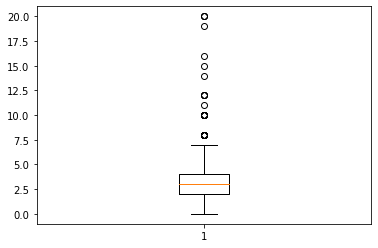

In [581]:
plt.boxplot(df1['버스'])
plt.show()

In [582]:
df1[['지하철', '버스']].describe()

,지하철,버스
count,411.000000,411.000000
mean,0.143552,3.708029
std,0.402827,2.836592
min,0.000000,0.000000
25%,0.000000,2.000000
50%,0.000000,3.000000
75%,0.000000,4.000000
max,3.000000,20.000000


In [583]:
df1['지하철'] = np.where(df1['지하철'] == 0, 0, 1)
df1['버스'] = np.where(df1['버스']>=7,7,df1['버스'])

## 지역 인코딩

In [584]:
df2 = pd.concat([df1.drop('지역', axis = 1),pd.get_dummies(df1.지역)], axis = 1)

In [585]:
df2.shape

(411, 75)

In [586]:
df2.columns

Index(['단지코드', '총세대수', '아파트세대수', '상가세대수', '공가수', '지하철', '버스', '단지내주차면수',
       '등록차량수', '임대건물구분_아파트', '임대건물구분_상가', '초장기세대수_비율', '장기세대수_비율', '단기세대수_비율',
       '공급유형_exL_비율', '공급유형_S_비율', '공급유형_L_비율', '국민임대_비율', '공공임대(50년)_비율',
       '영구임대_비율', '임대상가_비율', '공공임대(10년)_비율', '공공임대(분납)_비율', '장기전세_비율',
       '공공분양_비율', '행복주택_비율', '공공임대(5년)_비율', 'ABEGH_비율', 'A_비율', 'ACEFI_비율',
       'D_비율', 'JKLMNO_비율', '전용면적_10_비율', '전용면적_15_비율', '전용면적_20_비율',
       '전용면적_25_비율', '전용면적_30_비율', '전용면적_35_비율', '전용면적_40_비율', '전용면적_45_비율',
       '전용면적_50_비율', '전용면적_55_비율', '전용면적_60_비율', '전용면적_65_비율', '전용면적_70_비율',
       '전용면적_75_비율', '전용면적_80_비율', '00대', '10대', '20대', '30대', '40대', '50대',
       '60대', '70대', '80대', '90대', '100대', '1인당자동차', '강원도', '경기도', '경상남도',
       '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시',
       '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도'],
      dtype='object')

test 필요

df2['서울특별시'] = 0

df2 = df2[['단지코드', '총세대수', '아파트세대수', '상가세대수', '공가수', '지하철', '버스', '단지내주차면수',
       '초장기세대수', '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L',
       '국민임대_세대수', '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_20_세대수', '전용면적_30_세대수', '전용면적_40_세대수', '전용면적_50_세대수',
       '전용면적_60_세대수', '전용면적_70_세대수', '전용면적_80_세대수', '임대건물구분_아파트', '임대건물구분_상가',
       '00대', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대',
       '100대', '1인당자동차', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시',
       '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도']]

In [593]:
X = df2[['총세대수', '아파트세대수', '상가세대수', '공가수', '지하철', '버스', '단지내주차면수',
       '임대건물구분_아파트', '임대건물구분_상가', '초장기세대수_비율', '장기세대수_비율', '단기세대수_비율',
       '공급유형_exL_비율', '공급유형_S_비율', '공급유형_L_비율', '국민임대_비율', '공공임대(50년)_비율',
       '영구임대_비율', '임대상가_비율', '공공임대(10년)_비율', '공공임대(분납)_비율', '장기전세_비율',
       '공공분양_비율', '행복주택_비율', '공공임대(5년)_비율', 'ABEGH_비율', 'A_비율', 'ACEFI_비율',
       'D_비율', 'JKLMNO_비율', '전용면적_10_비율', '전용면적_15_비율', '전용면적_20_비율',
       '전용면적_25_비율', '전용면적_30_비율', '전용면적_35_비율', '전용면적_40_비율', '전용면적_45_비율',
       '전용면적_50_비율', '전용면적_55_비율', '전용면적_60_비율', '전용면적_65_비율', '전용면적_70_비율',
       '전용면적_75_비율', '전용면적_80_비율', '00대', '10대', '20대', '30대', '40대', '50대',
       '60대', '70대', '80대', '90대', '100대', '1인당자동차', '강원도', '경기도', '경상남도',
       '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시',
       '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']]

y = df2['등록차량수']

## 모델링

In [200]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [201]:
import warnings
warnings.filterwarnings('ignore')

In [202]:
df1 = pd.read_csv('data/train_ratio_0730.csv')
df1.columns

Index(['단지코드', '총세대수', '상가비율', '공가수', '지하철역', '버스정류장', '단지내주차면수', '등록차량수',
       '전용면적_15_비율', '전용면적_20_비율', '전용면적_25_비율', '전용면적_30_비율', '전용면적_35_비율',
       '전용면적_40_비율', '전용면적_45_비율', '전용면적_50_비율', '전용면적_55_비율', '전용면적_60_비율',
       '전용면적_65_비율', '전용면적_70_비율', '전용면적_75_비율', '전용면적_80_비율', '초장기비율', '장기비율',
       '단기비율', 'ABEGH비율', 'A비율', 'ACEFI비율', 'D비율', 'JKLMNO비율', '면적대비가격',
       '10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)',
       '30대(여자)', '30대(남자)', '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)',
       '60대(여자)', '60대(남자)', '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)',
       '90대(여자)', '90대(남자)', '100대(여자)', '100대(남자)', '1인당자동차', '평균 거주인 수',
       '평균분양가격', '총면적', '자전거도로비율', '운전면허소지자비율', '강원도', '경기도', '경상남도', '경상북도',
       '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도',
       '전라북도', '제주특별자치도', '충청남도', '충청북도'],
      dtype='object')

In [203]:
df2 = pd.read_csv('data/test_ratio_0730.csv')

In [204]:
df1.shape

(402, 75)

In [205]:
df2.shape

(146, 73)

In [206]:
df1.columns

Index(['단지코드', '총세대수', '상가비율', '공가수', '지하철역', '버스정류장', '단지내주차면수', '등록차량수',
       '전용면적_15_비율', '전용면적_20_비율', '전용면적_25_비율', '전용면적_30_비율', '전용면적_35_비율',
       '전용면적_40_비율', '전용면적_45_비율', '전용면적_50_비율', '전용면적_55_비율', '전용면적_60_비율',
       '전용면적_65_비율', '전용면적_70_비율', '전용면적_75_비율', '전용면적_80_비율', '초장기비율', '장기비율',
       '단기비율', 'ABEGH비율', 'A비율', 'ACEFI비율', 'D비율', 'JKLMNO비율', '면적대비가격',
       '10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)',
       '30대(여자)', '30대(남자)', '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)',
       '60대(여자)', '60대(남자)', '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)',
       '90대(여자)', '90대(남자)', '100대(여자)', '100대(남자)', '1인당자동차', '평균 거주인 수',
       '평균분양가격', '총면적', '자전거도로비율', '운전면허소지자비율', '강원도', '경기도', '경상남도', '경상북도',
       '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도',
       '전라북도', '제주특별자치도', '충청남도', '충청북도'],
      dtype='object')

In [207]:
df2.columns

Index(['단지코드', '총세대수', '상가비율', '공가수', '지하철역', '버스정류장', '단지내주차면수', '전용면적_15_비율',
       '전용면적_20_비율', '전용면적_25_비율', '전용면적_30_비율', '전용면적_35_비율', '전용면적_40_비율',
       '전용면적_45_비율', '전용면적_50_비율', '전용면적_55_비율', '전용면적_60_비율', '전용면적_70_비율',
       '전용면적_75_비율', '전용면적_80_비율', '초장기비율', '장기비율', '단기비율', 'ABEGH비율', 'A비율',
       'ACEFI비율', 'D비율', 'JKLMNO비율', '면적대비가격', '10대미만(여자)', '10대미만(남자)',
       '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
       '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
       '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
       '100대(여자)', '100대(남자)', '1인당자동차', '평균 거주인 수', '평균분양가격', '총면적', '규모별가격',
       '자전거도로비율', '운전면허소지자비율', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시',
       '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도',
       '충청북도'],
      dtype='object')

In [208]:
'단지코드', '총세대수', '상가비율', '공가수', '지하철역', '버스정류장', '단지내주차면수', '등록차량수'
'전용면적_15_비율', '전용면적_20_비율', '전용면적_25_비율', '전용면적_30_비율', '전용면적_35_비율','전용면적_40_비율',
'전용면적_45_비율', '전용면적_50_비율', '전용면적_55_비율', '전용면적_60_비율', '전용면적_65_비율', '전용면적_70_비율', '전용면적_75_비율', '전용면적_80_비율', '초장기비율', '장기비율',
       '단기비율', 

'단지코드', '총세대수', '상가비율', '공가수', '지하철역', '버스정류장', '단지내주차면수', 
'전용면적_15_비율', '전용면적_20_비율', '전용면적_25_비율', '전용면적_30_비율', '전용면적_35_비율', '전용면적_40_비율',
'전용면적_45_비율', '전용면적_50_비율', '전용면적_55_비율', '전용면적_60_비율', '전용면적_70_비율',
'전용면적_75_비율', '전용면적_80_비율', '초장기비율', '장기비율', '단기비율', 
'ABEGH비율', 'A비율','ACEFI비율', 'D비율', 'JKLMNO비율', '면적대비가격',
'1인당자동차', '평균 거주인 수', '평균분양가격', '총면적', '규모별가격',
'자전거도로비율', '운전면허소지자비율',

IndentationError: unexpected indent (<ipython-input-208-878d56f2028d>, line 4)

In [ ]:
df1['규모별가격'] = df1['총면적'] * df1['평균분양가격']

In [209]:
df2['전용면적_65_비율'] = 0

In [210]:
df1.drop('서울특별시', axis = 1, inplace = True)

In [211]:
df1.columns

Index(['단지코드', '총세대수', '상가비율', '공가수', '지하철역', '버스정류장', '단지내주차면수', '등록차량수',
       '전용면적_15_비율', '전용면적_20_비율', '전용면적_25_비율', '전용면적_30_비율', '전용면적_35_비율',
       '전용면적_40_비율', '전용면적_45_비율', '전용면적_50_비율', '전용면적_55_비율', '전용면적_60_비율',
       '전용면적_65_비율', '전용면적_70_비율', '전용면적_75_비율', '전용면적_80_비율', '초장기비율', '장기비율',
       '단기비율', 'ABEGH비율', 'A비율', 'ACEFI비율', 'D비율', 'JKLMNO비율', '면적대비가격',
       '10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)',
       '30대(여자)', '30대(남자)', '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)',
       '60대(여자)', '60대(남자)', '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)',
       '90대(여자)', '90대(남자)', '100대(여자)', '100대(남자)', '1인당자동차', '평균 거주인 수',
       '평균분양가격', '총면적', '자전거도로비율', '운전면허소지자비율', '강원도', '경기도', '경상남도', '경상북도',
       '광주광역시', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도'],
      dtype='object')

In [212]:
df2 = df2[['단지코드', '총세대수', '상가비율', '공가수', '지하철역', '버스정류장', '단지내주차면수',
       '전용면적_15_비율', '전용면적_20_비율', '전용면적_25_비율', '전용면적_30_비율', '전용면적_35_비율',
       '전용면적_40_비율', '전용면적_45_비율', '전용면적_50_비율', '전용면적_55_비율', '전용면적_60_비율',
       '전용면적_65_비율', '전용면적_70_비율', '전용면적_75_비율', '전용면적_80_비율', '초장기비율', '장기비율',
       '단기비율', 'ABEGH비율', 'A비율', 'ACEFI비율', 'D비율', 'JKLMNO비율', '면적대비가격',
       '10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)',
       '30대(여자)', '30대(남자)', '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)',
       '60대(여자)', '60대(남자)', '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)',
       '90대(여자)', '90대(남자)', '100대(여자)', '100대(남자)', '1인당자동차', '평균 거주인 수',
       '평균분양가격', '총면적', '자전거도로비율', '운전면허소지자비율', '강원도', '경기도', '경상남도', '경상북도',
       '광주광역시', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도', '규모별가격']]

In [213]:
df1.shape, df2.shape

((402, 74), (146, 74))

In [214]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 74 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        146 non-null    object 
 1   총세대수        146 non-null    int64  
 2   상가비율        146 non-null    float64
 3   공가수         146 non-null    float64
 4   지하철역        146 non-null    float64
 5   버스정류장       146 non-null    float64
 6   단지내주차면수     146 non-null    float64
 7   전용면적_15_비율  146 non-null    float64
 8   전용면적_20_비율  146 non-null    float64
 9   전용면적_25_비율  146 non-null    float64
 10  전용면적_30_비율  146 non-null    float64
 11  전용면적_35_비율  146 non-null    float64
 12  전용면적_40_비율  146 non-null    float64
 13  전용면적_45_비율  146 non-null    float64
 14  전용면적_50_비율  146 non-null    float64
 15  전용면적_55_비율  146 non-null    float64
 16  전용면적_60_비율  146 non-null    float64
 17  전용면적_65_비율  146 non-null    int64  
 18  전용면적_70_비율  146 non-null    float64
 19  전용면적_75_비율  146 non-null    f

In [215]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 74 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        402 non-null    object 
 1   총세대수        402 non-null    int64  
 2   상가비율        402 non-null    float64
 3   공가수         402 non-null    float64
 4   지하철역        402 non-null    float64
 5   버스정류장       402 non-null    float64
 6   단지내주차면수     402 non-null    float64
 7   등록차량수       402 non-null    float64
 8   전용면적_15_비율  402 non-null    float64
 9   전용면적_20_비율  402 non-null    float64
 10  전용면적_25_비율  402 non-null    float64
 11  전용면적_30_비율  402 non-null    float64
 12  전용면적_35_비율  402 non-null    float64
 13  전용면적_40_비율  402 non-null    float64
 14  전용면적_45_비율  402 non-null    float64
 15  전용면적_50_비율  402 non-null    float64
 16  전용면적_55_비율  402 non-null    float64
 17  전용면적_60_비율  402 non-null    float64
 18  전용면적_65_비율  402 non-null    float64
 19  전용면적_70_비율  402 non-null    f

In [216]:
X = df1[['단지코드', '총세대수', '상가비율', '공가수', '지하철역', '버스정류장', '단지내주차면수',
       '전용면적_15_비율', '전용면적_20_비율', '전용면적_25_비율', '전용면적_30_비율', '전용면적_35_비율',
       '전용면적_40_비율', '전용면적_45_비율', '전용면적_50_비율', '전용면적_55_비율', '전용면적_60_비율',
       '전용면적_65_비율', '전용면적_70_비율', '전용면적_75_비율', '전용면적_80_비율', '초장기비율', '장기비율',
       '단기비율', 'ABEGH비율', 'A비율', 'ACEFI비율', 'D비율', 'JKLMNO비율', '면적대비가격',
       '10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)',
       '30대(여자)', '30대(남자)', '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)',
       '60대(여자)', '60대(남자)', '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)',
       '90대(여자)', '90대(남자)', '100대(여자)', '100대(남자)', '1인당자동차', '평균 거주인 수',
       '평균분양가격', '총면적', '자전거도로비율', '운전면허소지자비율', '강원도', '경기도', '경상남도', '경상북도',
       '광주광역시', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도', '규모별가격']]

y = df1['등록차량수']

KeyError: "['규모별가격'] not in index"

In [ ]:
# 폰트 설정
mpl.rc('font', family='Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)
from sklearn.linear_model import LinearRegression   ## 회귀 분석
from sklearn.svm import SVC                         ## svm 분류모델
from sklearn.tree import DecisionTreeClassifier     ## Tree 분류모델
from sklearn.ensemble import RandomForestClassifier ## RandomForet
from sklearn.linear_model import LogisticRegression ## Logistic Regression
from sklearn.ensemble import RandomForestRegressor  ## RandomForet 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

### 다중공선성 확인

In [217]:
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 85)

pandas version:  1.2.5


In [218]:
X1 = X.iloc[:,1:]

X1

,총세대수,상가비율,공가수,지하철역,버스정류장,단지내주차면수,전용면적_15_비율,전용면적_20_비율,전용면적_25_비율,전용면적_30_비율,전용면적_35_비율,전용면적_40_비율,전용면적_45_비율,전용면적_50_비율,전용면적_55_비율,전용면적_60_비율,전용면적_65_비율,전용면적_70_비율,전용면적_75_비율,전용면적_80_비율,초장기비율,장기비율,단기비율,ABEGH비율,A비율,ACEFI비율,D비율,JKLMNO비율,면적대비가격,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),1인당자동차,평균 거주인 수,평균분양가격,총면적,자전거도로비율,운전면허소지자비율,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도,규모별가격
0,545,0.000000,17.0,0.0,3.0,624.0,0.000,0.000000,0.000000,0.506422,0.146789,0.000000,0.104587,0.242202,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,6.781471e+05,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,0.511963,2.7,119.1,20245.0,0.078361,0.067955,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2411179.5
1,1216,0.000000,13.0,1.0,1.0,1285.0,0.000,0.000000,0.000000,0.320724,0.000000,0.297697,0.279605,0.101974,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.095163e+06,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066,0.456921,2.7,140.9,47680.0,0.032287,0.030191,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6718112.0
2,755,0.000000,6.0,1.0,3.0,734.0,0.000,0.000000,0.000000,0.000000,0.317881,0.000000,0.000000,0.401325,0.280795,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,8.111259e+05,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.435486,2.8,169.9,35210.0,0.236382,0.277113,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5982179.0
3,696,0.000000,14.0,0.0,2.0,645.0,0.000,0.000000,0.000000,0.000000,0.364943,0.000000,0.281609,0.353448,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,6.806990e+05,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013,0.510777,2.6,129.1,30010.0,0.059367,0.035992,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3874291.0
4,566,0.000000,9.0,0.0,6.0,517.0,0.000,0.000000,0.000000,0.000000,0.478799,0.000000,0.369258,0.151943,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,6.787882e+05,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013,0.510777,2.6,129.1,23190.0,0.059367,0.035992,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2993829.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,790,0.000000,13.0,0.0,3.0,673.0,0.000,0.000000,0.121519,0.037975,0.249367,0.000000,0.274684,0.159494,0.156962,0.0,0.0,0.000000,0.0,0.000000,0.126582,0.873418,0.000000,0.556962,0.316456,0.126582,0.000000,0.0,1.902103e+06,0.015323,0.015627,0.025210,0.026121,0.052712,0.056782,0.047655,0.051877,0.054216,0.068673,0.077163,0.064801,0.119639,0.078939,0.097543,0.061050,0.047853,0.023463,0.011344,0.003326,0.000532,0.000152,0.321114,2.8,134.9,33080.0,0.039434,0.199806,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4462492.0
398,1401,0.000000,2.0,1.0,6.0,1636.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.179872,0.312







X1.drop(['장기세대수_비율'], axis = 1, inplace = True)


# 총세대수 아파트세대수 비슷해버리니까 하나 제거
X1.drop('총세대수', axis=1, inplace = True)

# 공급유형 기간 놈들 제거
X1.drop(['초장기비율','단기비율'], axis = 1, inplace = True)

In [219]:
# 버스지하철 합친 칼럼화


X1['대중교통'] = X1.버스정류장 + X1.지하철역
X1.drop(['버스정류장','지하철역'],axis=1, inplace=True)


df2['대중교통'] =df2.버스정류장 + df2.지하철역
df2.drop(['버스정류장','지하철역'],axis=1, inplace=True)

In [220]:
X1.drop('총세대수', axis=1, inplace = True) # 3. * 18 진입
df2.drop('총세대수', axis=1, inplace = True)

X1.drop('상가비율', axis = 1, inplace = True) # 다시 2. * 18

<AxesSubplot:xlabel='전용면적_25_비율'>

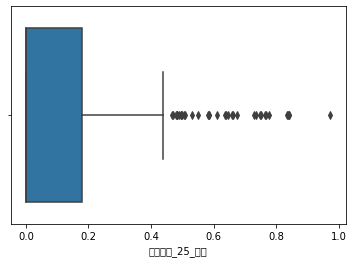

In [221]:
sns.boxplot(X1.iloc[:,5])

In [222]:
X1

,상가비율,공가수,단지내주차면수,전용면적_15_비율,전용면적_20_비율,전용면적_25_비율,전용면적_30_비율,전용면적_35_비율,전용면적_40_비율,전용면적_45_비율,전용면적_50_비율,전용면적_55_비율,전용면적_60_비율,전용면적_65_비율,전용면적_70_비율,전용면적_75_비율,전용면적_80_비율,초장기비율,장기비율,단기비율,ABEGH비율,A비율,ACEFI비율,D비율,JKLMNO비율,면적대비가격,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),1인당자동차,평균 거주인 수,평균분양가격,총면적,자전거도로비율,운전면허소지자비율,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도,규모별가격,대중교통
0,0.000000,17.0,624.0,0.000,0.000000,0.000000,0.506422,0.146789,0.000000,0.104587,0.242202,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,6.781471e+05,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,0.511963,2.7,119.1,20245.0,0.078361,0.067955,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2411179.5,3.0
1,0.000000,13.0,1285.0,0.000,0.000000,0.000000,0.320724,0.000000,0.297697,0.279605,0.101974,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.095163e+06,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066,0.456921,2.7,140.9,47680.0,0.032287,0.030191,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6718112.0,2.0
2,0.000000,6.0,734.0,0.000,0.000000,0.000000,0.000000,0.317881,0.000000,0.000000,0.401325,0.280795,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,8.111259e+05,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.435486,2.8,169.9,35210.0,0.236382,0.277113,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5982179.0,4.0
3,0.000000,14.0,645.0,0.000,0.000000,0.000000,0.000000,0.364943,0.000000,0.281609,0.353448,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,6.806990e+05,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013,0.510777,2.6,129.1,30010.0,0.059367,0.035992,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3874291.0,2.0
4,0.000000,9.0,517.0,0.000,0.000000,0.000000,0.000000,0.478799,0.000000,0.369258,0.151943,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,6.787882e+05,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013,0.510777,2.6,129.1,23190.0,0.059367,0.035992,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2993829.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0.000000,13.0,673.0,0.000,0.000000,0.121519,0.037975,0.249367,0.000000,0.274684,0.159494,0.156962,0.0,0.0,0.000000,0.0,0.000000,0.126582,0.873418,0.000000,0.556962,0.316456,0.126582,0.000000,0.0,1.902103e+06,0.015323,0.015627,0.025210,0.026121,0.052712,0.056782,0.047655,0.051877,0.054216,0.068673,0.077163,0.064801,0.119639,0.078939,0.097543,0.061050,0.047853,0.023463,0.011344,0.003326,0.000532,0.000152,0.321114,2.8,134.9,33080.0,0.039434,0.199806,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4462492.0,3.0
398,0.000000,2.0,1636.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.179872,0.312634,0.0,0.0,0.339757,0.0,0.167737,0.507495,0.000000,0.492505,0.000000,0.492505,0.

In [223]:
df2

,단지코드,상가비율,공가수,단지내주차면수,전용면적_15_비율,전용면적_20_비율,전용면적_25_비율,전용면적_30_비율,전용면적_35_비율,전용면적_40_비율,전용면적_45_비율,전용면적_50_비율,전용면적_55_비율,전용면적_60_비율,전용면적_65_비율,전용면적_70_비율,전용면적_75_비율,전용면적_80_비율,초장기비율,장기비율,단기비율,ABEGH비율,A비율,ACEFI비율,D비율,JKLMNO비율,면적대비가격,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),1인당자동차,평균 거주인 수,평균분양가격,총면적,자전거도로비율,운전면허소지자비율,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도,규모별가격,대중교통
0,C1072,0.000000,14.0,683.0,0.000000,0.000000,0.000000,0.000000,0.153846,0.000000,0.347480,0.498674,0.000000,0.0,0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.326448e+06,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.435486,2.8,169.9,34650.0,0.236382,0.346308,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5887035.0,2.0
1,C1128,0.000000,9.0,1216.0,0.000000,0.000000,0.000000,0.000000,0.310192,0.000000,0.262925,0.426883,0.000000,0.0,0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.254593e+06,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.435486,2.8,169.9,59620.0,0.236382,0.346308,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,10129438.0,3.0
2,C1456,0.000000,18.0,547.0,0.000000,0.000000,0.000000,0.132472,0.266559,0.000000,0.316640,0.213247,0.071082,0.0,0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.233133e+06,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,0.060769,0.082899,0.068855,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028,0.408684,2.6,137.1,26075.0,0.019338,0.080595,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3574882.5,7.0
3,C1840,0.000000,7.0,543.0,0.000000,0.000000,0.000000,0.000000,0.564924,0.000000,0.293423,0.141653,0.000000,0.0,0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,6.954371e+05,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013,0.510777,2.6,129.1,23755.0,0.059367,0.044979,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3066770.5,3.0
4,C1332,0.000000,11.0,1112.0,0.000000,0.000000,0.000000,0.000000,0.327679,0.000000,0.437934,0.234387,0.000000,0.0,0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.504902e+06,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.435486,2.8,169.9,55635.0,0.236382,0.346308,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9452386.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,C2253,0.024117,0.0,173.0,0.000861,0.006029,0.653747,0.334195,0.000000,0.001723,0.000000,0.000000,0.001723,0.0,0,0.0,0.000000,0.001723,0.975883,0.000000,0.024117,0.000000,0.0,0.975883,0.024117,0.000000,3.411511e+05,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017,0.507752,2.5,138.6,31120.0,0.069765,0.039144,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4313232.0,2.0
142,C1729,0.027113,0.0,131.0,0.004785,0.011164,0.001595,0.507177,0.001595,0.470494,0.000000,0.001595,0.000000,0.0,0,0.0,0.00000

<AxesSubplot:xlabel='전용면적_25_비율'>

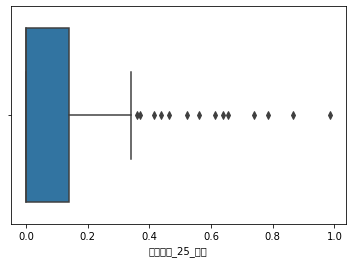

In [224]:
sns.boxplot(df2.iloc[:,6])

<AxesSubplot:xlabel='전용면적_35_비율'>

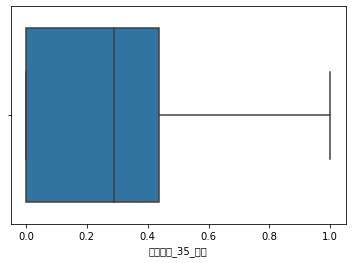

In [83]:
sns.boxplot(X1.iloc[:,6])

<AxesSubplot:xlabel='전용면적_45_비율'>

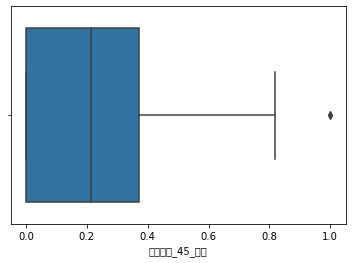

In [80]:
sns.boxplot(X1.iloc[:,8])

<AxesSubplot:xlabel='전용면적_50_비율'>

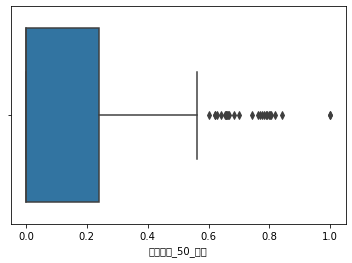

In [84]:
sns.boxplot(X1.iloc[:,9])

<AxesSubplot:xlabel='전용면적_55_비율'>

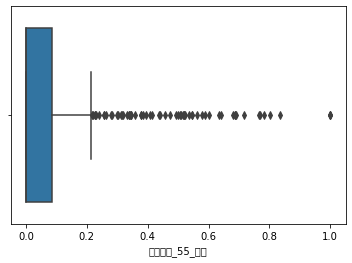

In [85]:
sns.boxplot(X1.iloc[:,10])

In [225]:
X1['합30'] = X1.전용면적_15_비율 + X1.전용면적_20_비율 + X1.전용면적_25_비율 + X1.전용면적_30_비율
X1['합40'] = X1.전용면적_35_비율 + X1.전용면적_40_비율 
X1['합50'] = X1.전용면적_45_비율 +X1.전용면적_50_비율
X1['합80'] = X1.전용면적_55_비율 + X1.전용면적_60_비율 + X1.전용면적_65_비율 + X1.전용면적_70_비율 + X1.전용면적_75_비율 + X1.전용면적_80_비율


df2['합30'] = df2.전용면적_15_비율 + df2.전용면적_20_비율 + df2.전용면적_25_비율 + df2.전용면적_30_비율
df2['합40'] = df2.전용면적_35_비율 + df2.전용면적_40_비율 
df2['합50'] = df2.전용면적_45_비율 +df2.전용면적_50_비율
df2['합80'] = df2.전용면적_55_비율 + df2.전용면적_60_비율 + df2.전용면적_65_비율 + df2.전용면적_70_비율 + df2.전용면적_75_비율 + df2.전용면적_80_비율


In [226]:
a = X1.iloc[:,-4:]
a

,합30,합40,합50,합80
0,0.506422,0.146789,0.346789,0.000000
1,0.320724,0.297697,0.381579,0.000000
2,0.000000,0.317881,0.401325,0.280795
3,0.000000,0.364943,0.635057,0.000000
4,0.000000,0.478799,0.521201,0.000000
...,...,...,...,...
397,0.159494,0.249367,0.434177,0.156962
398,0.000000,0.000000,0.179872,0.820128
399,0.602896,0.239917,0.157187,0.000000
400,0.808333,0.191667,0.000000,0.000000


In [227]:
X1.drop(['전용면적_15_비율', '전용면적_20_비율', '전용면적_25_비율', '전용면적_30_비율', '전용면적_35_비율',
       '전용면적_40_비율', '전용면적_45_비율', '전용면적_50_비율', '전용면적_55_비율', '전용면적_60_비율',
       '전용면적_65_비율', '전용면적_70_비율', '전용면적_75_비율', '전용면적_80_비율'], axis = 1, inplace = True)

df2.drop(['전용면적_15_비율', '전용면적_20_비율', '전용면적_25_비율', '전용면적_30_비율', '전용면적_35_비율',
       '전용면적_40_비율', '전용면적_45_비율', '전용면적_50_비율', '전용면적_55_비율', '전용면적_60_비율',
       '전용면적_65_비율', '전용면적_70_비율', '전용면적_75_비율', '전용면적_80_비율'], axis = 1, inplace = True)

In [228]:
model = sm.OLS(y, X1)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  등록차량수   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     69.71
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          5.23e-136
Time:                        04:08:22   Log-Likelihood:                -2568.0
No. Observations:                 402   AIC:                             5202.
Df Residuals:                     369   BIC:                             5334.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
상가비율        -252.4734   2606.026     -0.097      0.9

In [229]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X1.values, i) for i in range(X1.shape[1])]
vif["features"] = X1.columns
vif

,VIF Factor,features
0,5.407154e+00,상가비율
1,1.768598e+00,공가수
2,1.216649e+01,단지내주차면수
3,inf,초장기비율
4,inf,장기비율
5,inf,단기비율
6,inf,ABEGH비율
7,inf,A비율
8,inf,ACEFI비율
9,3.916174e+14,D비율


In [232]:
from sklearn.ensemble import VotingRegressor

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.25)

reg1 = RandomForestRegressor(random_state=1)
reg2 = ElasticNet(random_state=1)
reg3 = Lasso(random_state=1)
reg4 = GradientBoostingRegressor(random_state=1)
reg5 = XGBRegressor(random_state=1)
reg1.fit(X1_train, y1_train)
reg2.fit(X1_train, y1_train)
reg3.fit(X1_train, y1_train)
reg4.fit(X1_train, y1_train)
reg5.fit(X1_train, y1_train)
ereg1 = VotingRegressor([('rf', reg1), ('en', reg2), ('ls', reg3), ('gb', reg4), ('xg', reg5)])
ereg1.fit(X1_train, y1_train)
    
ereg2 = VotingRegressor([('rf', reg1), ('en', reg2), ('ls', reg3), ('gb', reg4)])
ereg2.fit(X1_train, y1_train)

ereg3 = VotingRegressor([('rf', reg1), ('en', reg2), ('ls', reg3)])
ereg3.fit(X1_train, y1_train)
    

ereg4 = VotingRegressor([('rf', reg1), ('en', reg2), ('gb', reg4)])
ereg4.fit(X1_train, y1_train)


a=[]

a.append(round(mean_absolute_error(y1_test, reg1.predict(X1_test)),3))
a.append(round(mean_absolute_error(y1_test, reg2.predict(X1_test)),3))
a.append(round(mean_absolute_error(y1_test, reg3.predict(X1_test)),3))
a.append(round(mean_absolute_error(y1_test, reg4.predict(X1_test)),3))
a.append(round(mean_absolute_error(y1_test, reg5.predict(X1_test)),3))
a.append(round(mean_absolute_error(y1_test, ereg1.predict(X1_test)),3))

result_models = pd.DataFrame(columns = ['RFR','LASSO','ELASTICNET','GRADIENT','XGB','Voting'])
result_models.loc[len(result_models)] = a



print(round(mean_absolute_error(y1_test, ereg2.predict(X1_test)),3),
     round(mean_absolute_error(y1_test, ereg3.predict(X1_test)),3),
     round(mean_absolute_error(y1_test, ereg4.predict(X1_test)),3))
result_models

99.942 103.084 103.683


,RFR,LASSO,ELASTICNET,GRADIENT,XGB,Voting
0,109.3,124.058,109.194,110.19,120.692,101.694


In [236]:
from sklearn.ensemble import VotingRegressor


reg1 = RandomForestRegressor(random_state=1)
reg2 = ElasticNet(random_state=1)
reg3 = Lasso(random_state=1)
reg4 = GradientBoostingRegressor(random_state=1)
reg5 = XGBRegressor(random_state=1)
reg1.fit(X1, y)
reg2.fit(X1, y)
reg3.fit(X1, y)
reg4.fit(X1, y)
reg5.fit(X1, y)
ereg1 = VotingRegressor([('rf', reg1), ('en', reg2), ('ls', reg3), ('gb', reg4), ('xg', reg5)])
ereg1.fit(X1, y)
    
ereg2 = VotingRegressor([('rf', reg1), ('en', reg2), ('ls', reg3), ('gb', reg4)])
ereg2.fit(X1, y)

ereg3 = VotingRegressor([('rf', reg1), ('en', reg2), ('ls', reg3)])
ereg3.fit(X1, y)
    
    
ereg4 = VotingRegressor([('rf', reg1), ('gb', reg4)])
ereg4.fit(X1, y)
    
a=[]

a.append(round(mean_absolute_error(y, reg1.predict(X1)),3))
a.append(round(mean_absolute_error(y, reg2.predict(X1)),3))
a.append(round(mean_absolute_error(y, reg3.predict(X1)),3))
a.append(round(mean_absolute_error(y, reg4.predict(X1)),3))
a.append(round(mean_absolute_error(y, reg5.predict(X1)),3))
a.append(round(mean_absolute_error(y, ereg1.predict(X1)),3))

result_models = pd.DataFrame(columns = ['RFR','LASSO','ELASTICNET','GRADIENT','XGB','Voting'])
result_models.loc[len(result_models)] = a



print(round(mean_absolute_error(y1_test, ereg2.predict(X1_test)),3),
     round(mean_absolute_error(y1_test, ereg3.predict(X1_test)),3),
     round(mean_absolute_error(y1_test, ereg4.predict(X1_test)),3))
result_models

71.665 80.651 46.13


,RFR,LASSO,ELASTICNET,GRADIENT,XGB,Voting
0,43.06,118.08,104.094,52.72,0.334,60.133


In [256]:
A = pd.DataFrame([df2.단지코드, ereg2.predict(df2.iloc[:,1:])]).T

In [257]:
A.columns = ['code', 'num']

In [258]:
A.to_csv('0730_try3.csv', index=False)

In [259]:
B.loc[(B.단지코드 == 'C2235') | (B.단지코드 == 'C1327') | (B.단지코드 == 'C2497') | (B.단지코드 == 'C2675')]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
579,C2675,512,아파트,경기도,국민임대,36.65,130,9.0,A,18476000,154790,0.0,3.0,1016.0
580,C2675,512,아파트,경기도,국민임대,46.90,44,9.0,A,34082000,232200,0.0,3.0,1016.0
581,C2675,512,아파트,경기도,국민임대,46.90,80,9.0,A,34082000,232200,0.0,3.0,1016.0
582,C2675,512,아파트,경기도,국민임대,46.90,50,9.0,A,34082000,232200,0.0,3.0,1016.0
583,C2675,512,아파트,경기도,국민임대,46.90,88,9.0,A,34082000,232200,0.0,3.0,1016.0
584,C2675,512,아파트,경기도,국민임대,47.40,30,9.0,A,34082000,232200,0.0,3.0,1016.0
585,C2675,512,아파트,경기도,국민임대,51.93,75,9.0,A,43819000,275900,0.0,3.0,1016.0
586,C2675,512,아파트,경기도,국민임대,51.93,15,9.0,A,43819000,275900,0.0,3.0,1016.0
729,C2497,488,아파트,경상북도,공공임대(10년),59.95,89,37.0,A,31000000,416000,0.0,6.0,624.0
730,C2497,488,아파트,경상북도,공공임대(10년),59.99,41,37.0,A,31000000,416000,0.0,6.0,624.0


In [255]:
df2.loc[df2.단지코드 == 'C1128']

,단지코드,상가비율,공가수,단지내주차면수,초장기비율,장기비율,단기비율,ABEGH비율,A비율,ACEFI비율,D비율,JKLMNO비율,면적대비가격,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),1인당자동차,평균 거주인 수,평균분양가격,총면적,자전거도로비율,운전면허소지자비율,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도,규모별가격,대중교통,합30,합40,합50,합80
1,C1128,0.0,9.0,1216.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.254593e+06,0.03803,0.039507,0.052546,0.05399,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.00539,0.001707,0.00029,0.000067,0.435486,2.8,169.9,59620.0,0.236382,0.346308,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,10129438.0,3.0,0.0,0.310192,0.689808,0.0


In [171]:
df2.loc[df2.운전면허소지자비율.isnull()]

,단지코드,상가비율,공가수,단지내주차면수,초장기비율,장기비율,단기비율,ABEGH비율,A비율,ACEFI비율,D비율,JKLMNO비율,면적대비가격,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),1인당자동차,평균 거주인 수,평균분양가격,총면적,자전거도로비율,운전면허소지자비율,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도,규모별가격,대중교통,합30,합40,합50,합80
0,C1072,0.000000,14.0,683.0,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.326448e+06,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.435486,2.8,169.9,34650.0,0.236382,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5887035.0,2.0,0.000000,0.153846,0.846154,0.000000
1,C1128,0.000000,9.0,1216.0,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.254593e+06,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.435486,2.8,169.9,59620.0,0.236382,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,10129438.0,3.0,0.000000,0.310192,0.689808,0.000000
2,C1456,0.000000,18.0,547.0,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.233133e+06,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,0.060769,0.082899,0.068855,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028,0.408684,2.6,137.1,26075.0,0.019338,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3574882.5,7.0,0.132472,0.266559,0.529887,0.071082
3,C1840,0.000000,7.0,543.0,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,6.954371e+05,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013,0.510777,2.6,129.1,23755.0,0.059367,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3066770.5,3.0,0.000000,0.564924,0.435076,0.000000
4,C1332,0.000000,11.0,1112.0,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.504902e+06,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.435486,2.8,169.9,55635.0,0.236382,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9452386.5,2.0,0.000000,0.327679,0.672321,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,C2253,0.024117,0.0,173.0,0.975883,0.000000,0.024117,0.000000,0.0,0.975883,0.024117,0.000000,3.411511e+05,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017,0.507752,2.5,138.6,31120.0,0.069765,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4313232.0,2.0,0.994832,0.001723,0.000000,0.003445
143,C1729,0.027113,0.0,131.0,0.972887,0.000000,0.027113,0.000000,0.0,0.972887,0.027113,0.000000,4.368000e+05,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017,0.507752,2.5,138.6,21715.0,0.069765,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3009699.0,5.0,0.524721,0.472089,0.001595,0.001595
144,C1006,0.013289,27.0,428.0,0.986711,0.000000,0.013289,0.000000,0.0,0.986711,0.013289,0.000000,5.227481e+05,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066,0.456921,2.7,140.9,39625.0,0.032287,Na

In [668]:
X = df2.copy()

- Using describe function you will get know the values of each column if it contains numbers. find the outliers and replace those with Mean or Median or Mode values.


- Identify the columns to know the impact on data set ex: heat maps, we will get know the columns which are key once.


- Use multiple models (Linear Regression, Random forest, SVM, etc.) with multiple parameters (change the parameter values in each model) for better results.


- Check the error with multiple models with multiple parameters and analyze the results.

In [53]:
X.describe()

,총세대수,상가비율,공가수,지하철역,버스정류장,단지내주차면수,전용면적_15_비율,전용면적_20_비율,전용면적_25_비율,전용면적_30_비율,전용면적_35_비율,전용면적_40_비율,전용면적_45_비율,전용면적_50_비율,전용면적_55_비율,전용면적_60_비율,전용면적_65_비율,전용면적_70_비율,전용면적_75_비율,전용면적_80_비율,초장기비율,장기비율,단기비율,ABEGH비율,A비율,ACEFI비율,D비율,JKLMNO비율,면적대비가격,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),1인당자동차,평균 거주인 수,평균분양가격,총면적,자전거도로비율,운전면허소지자비율,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,4.020000e+02,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,723.261194,0.002041,13.442786,0.144279,3.360697,578.880597,0.017674,0.021536,0.111285,0.051733,0.282091,0.012857,0.223488,0.149729,0.091486,0.000020,0.002315,0.013339,0.000007,0.021856,0.114047,0.748227,0.137726,0.747440,0.090250,0.089224,0.002719,0.070367,9.224965e+05,0.030844,0.032119,0.051374,0.053547,0.061986,0.065567,0.061506,0.059664,0.077808,0.071608,0.082931,0.070101,0.082278,0.065502,0.048878,0.034176,0.029845,0.012400,0.006029,0.001517,0.000256,0.000065,0.498841,2.670149,143.800498,29009.800995,0.092228,0.092701,0.089552,0.206468,0.129353,0.049751,0.059701,0.044776,0.059701,0.062189,0.007463,0.017413,0.057214,0.052239,0.034826,0.047264,0.072139
std,411.576119,0.006692,10.275893,0.404562,1.788505,361.363586,0.077434,0.098333,0.204109,0.133650,0.249373,0.064663,0.212723,0.217143,0.193617,0.000295,0.034429,0.074159,0.000060,0.121487,0.300229,0.422997,0.340498,0.423057,0.281729,0.263078,0.025874,0.253995,3.893159e+05,0.005079,0.005383,0.008310,0.008346,0.004166,0.004827,0.008781,0.008869,0.005893,0.005393,0.004594,0.003921,0.010831,0.007507,0.010149,0.006267,0.006052,0.002585,0.001145,0.000393,0.000071,0.000104,0.087208,0.092645,21.559207,16173.137104,0.075954,0.096549,0.285895,0.405274,0.336009,0.217702,0.237228,0.207070,0.237228,0.241800,0.086171,0.130967,0.232540,0.222786,0.183567,0.212467,0.259041
min,26.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.737581e+05,0.015323,0.015627,0.025210,0.026121,0.052712,0.056782,0.047049,0.046596,0.054216,0.060769,0.067065,0.056631,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.000895,0.000084,0.000000,0.321114,2.500000,112.000000,670.000000,0.008583,0.007030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,443.500000,0.000000,5.000000,0.000000,2.000000,316.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.668259,0.000000,0.649757,0.000000,0.000000,0.000000,0.000000,6.442840e+05,0.027400,0.026902,0.051287,0.052712,0.058484,0.059894,0.056414,0.053471,0.076201,0.067600,0.079299,0.067443,0.074237,0.058419,0.042422,0.031754,0.025136,0.011212,0.005386,0.001259,0.000179,0.000013,0.435486,2.600000,129.100000,17400.000000,0.043676,0.031322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [670]:
X.describe()

,총세대수,아파트세대수,상가세대수,공가수,지하철,버스,단지내주차면수,등록차량수,임대건물구분_아파트,임대건물구분_상가,초장기세대수_비율,장기세대수_비율,단기세대수_비율,공급유형_exL_비율,공급유형_S_비율,공급유형_L_비율,국민임대_비율,공공임대(50년)_비율,영구임대_비율,임대상가_비율,공공임대(10년)_비율,공공임대(분납)_비율,장기전세_비율,공공분양_비율,행복주택_비율,공공임대(5년)_비율,ABEGH_비율,A_비율,ACEFI_비율,D_비율,JKLMNO_비율,전용면적_10_비율,전용면적_15_비율,전용면적_20_비율,전용면적_25_비율,전용면적_30_비율,전용면적_35_비율,전용면적_40_비율,전용면적_45_비율,전용면적_50_비율,전용면적_55_비율,전용면적_60_비율,전용면적_65_비율,전용면적_70_비율,전용면적_75_비율,전용면적_80_비율,00대,10대,20대,30대,40대,50대,60대,70대,80대,90대,100대,1인당자동차,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.0,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,722.347932,720.980535,1.644769,13.416058,0.126521,3.377129,581.676399,564.318735,1.0,0.080292,0.845006,0.082260,0.072734,0.806569,0.110706,0.082725,0.731073,0.023045,0.089653,0.001475,0.079085,0.002405,0.000770,0.001235,0.068826,0.002433,0.731073,0.107739,0.089653,0.002709,0.068826,0.000023,0.017397,0.021078,0.110186,0.051851,0.276687,0.012586,0.220221,0.146739,0.093015,0.000025,0.002264,0.016365,0.001442,0.030123,0.062826,0.104733,0.127463,0.121037,0.149317,0.153023,0.148003,0.083335,0.042361,0.007579,0.000323,0.498101,0.090024,0.204380,0.128954,0.051095,0.058394,0.043796,0.060827,0.060827,0.014599,0.007299,0.017032,0.058394,0.051095,0.034063,0.046229,0.072993
std,407.850156,406.119014,5.594888,10.325419,0.332840,1.789226,360.180869,386.819089,0.0,0.272076,0.357306,0.273021,0.255192,0.365834,0.278116,0.273582,0.432486,0.144334,0.264157,0.005716,0.268494,0.038475,0.015610,0.025033,0.251403,0.049326,0.432486,0.305764,0.264157,0.025606,0.251403,0.000171,0.077246,0.097338,0.203469,0.134320,0.249854,0.064039,0.213736,0.215753,0.193901,0.000308,0.034051,0.079524,0.021034,0.139121,0.010588,0.016932,0.008673,0.017248,0.010638,0.007506,0.018252,0.016929,0.008555,0.001505,0.000115,0.087312,0.286565,0.403739,0.335557,0.220460,0.234773,0.204889,0.239304,0.239304,0.120085,0.085227,0.129547,0.234773,0.220460,0.181613,0.210236,0.260442
min,26.000000,26.000000,0.000000,0.000000,0.000000,0.000000,13.000000,13.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030950,0.051330,0.109495,0.095915,0.122722,0.123696,0.116443,0.052279,0.020979,0.004464,0.000084,0.321114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,447.500000,446.000000,0.000000,5.000000,0.000000,2.000000,317.500000,286.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054303,0.103999,0.118378,0.111448,0.144203,0.147345,0.132656,0.075148,0.037490,0.006696,0.000247,0.435486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

<AxesSubplot:xlabel='총세대수'>

findfont: Font family ['Gothic'] not found. Falling back to DejaVu Sans.


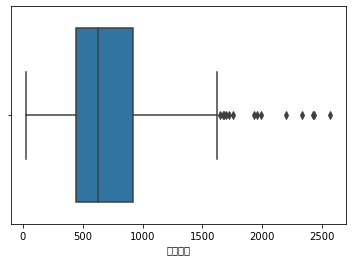

In [56]:
sns.boxplot(X.총세대수)

In [57]:
iqr = (X['총세대수'].describe()[6] - X['총세대수'].describe()[4])* 1.5

X['총세대수'] = np.where(X['총세대수'] < (X['총세대수'].describe()[4] - iqr),
                    (X['총세대수'].describe()[4] - iqr), X['총세대수'])
X['총세대수'] = np.where(X['총세대수'] > (X['총세대수'].describe()[6] + iqr),
                    (X['총세대수'].describe()[6] + iqr),
                    X['총세대수'])

iqr = (X['아파트세대수'].describe()[6] - X['아파트세대수'].describe()[4])* 1.5

X['아파트세대수'] = np.where(X['아파트세대수'] < (X['아파트세대수'].describe()[4] - iqr),
                    (X['아파트세대수'].describe()[4] - iqr), X['아파트세대수'])
X['아파트세대수'] = np.where(X['아파트세대수'] > (X['아파트세대수'].describe()[6] + iqr),
                    (X['아파트세대수'].describe()[6] + iqr),
                    X['아파트세대수'])

X = X.drop('상가세대수', axis=1)

In [58]:
iqr = (X['공가수'].describe()[6] - X['공가수'].describe()[4])* 1.5

X['공가수'] = np.where(X['공가수'] < (X['공가수'].describe()[4] - iqr),
                    (X['공가수'].describe()[4] - iqr), X['공가수'])
X['공가수'] = np.where(X['공가수'] > (X['공가수'].describe()[6] + iqr),
                    (X['공가수'].describe()[6] + iqr),
                    X['공가수'])

In [59]:
iqr = (X['단지내주차면수'].describe()[6] - X['단지내주차면수'].describe()[4])* 1.5

X['단지내주차면수'] = np.where(X['단지내주차면수'] < (X['단지내주차면수'].describe()[4] - iqr),
                    (X['단지내주차면수'].describe()[4] - iqr), X['단지내주차면수'])
X['단지내주차면수'] = np.where(X['단지내주차면수'] > (X['단지내주차면수'].describe()[6] + iqr),
                    (X['단지내주차면수'].describe()[6] + iqr),
                    X['단지내주차면수'])

iqr = (X['초장기세대수_비율'].describe()[6] - X['초장기세대수_비율'].describe()[4])* 1.5

X['초장기세대수_비율'] = np.where(X['초장기세대수_비율'] < (X['초장기세대수_비율'].describe()[4] - iqr),
                    (X['초장기세대수_비율'].describe()[4] - iqr), X['초장기세대수_비율'])
X['초장기세대수_비율'] = np.where(X['초장기세대수_비율'] > (X['초장기세대수_비율'].describe()[6] + iqr),
                    (X['초장기세대수_비율'].describe()[6] + iqr),
                    X['초장기세대수_비율'])

iqr = (X['장기세대수_비율'].describe()[6] - X['장기세대수_비율'].describe()[4])* 1.5

X['장기세대수_비율'] = np.where(X['장기세대수_비율'] < (X['장기세대수_비율'].describe()[4] - iqr),
                    (X['장기세대수_비율'].describe()[4] - iqr), X['장기세대수_비율'])
X['장기세대수_비율'] = np.where(X['장기세대수_비율'] > (X['장기세대수_비율'].describe()[6] + iqr),
                    (X['장기세대수_비율'].describe()[6] + iqr),
                    X['장기세대수_비율'])

iqr = (X['단기세대수_비율'].describe()[6] - X['단기세대수_비율'].describe()[4])* 1.5

X['단기세대수_비율'] = np.where(X['단기세대수_비율'] < (X['단기세대수_비율'].describe()[4] - iqr),
                    (X['단기세대수_비율'].describe()[4] - iqr), X['단기세대수_비율'])
X['단기세대수_비율'] = np.where(X['단기세대수_비율'] > (X['단기세대수_비율'].describe()[6] + iqr),
                    (X['단기세대수_비율'].describe()[6] + iqr),
                    X['단기세대수_비율'])

iqr = (X['국민임대_비율'].describe()[6] - X['국민임대_비율'].describe()[4])* 1.5

X['국민임대_비율'] = np.where(X['국민임대_비율'] < (X['국민임대_비율'].describe()[4] - iqr),
                    (X['국민임대_비율'].describe()[4] - iqr), X['국민임대_비율'])
X['국민임대_비율'] = np.where(X['국민임대_비율'] > (X['국민임대_비율'].describe()[6] + iqr),
                    (X['국민임대_비율'].describe()[6] + iqr),
                    X['국민임대_비율'])

X['공공임대(50년)_비율'] = np.where(X['공공임대(50년)_비율']>0,
                    1, 0)

X['영구임대_비율'] = np.where(X['영구임대_비율']>0,
                    1, 0)

#임대상가_세대수	공공임대(10년)_세대수	공공임대(분납)_세대수	장기전세_세대수	공공분양_세대수	행복주택_세대수	공공임대(5년)_세대수

X['임대상가_비율'] = np.where(X['임대상가_비율']>0,
                    1, 0)

X['공공임대(10년)_비율'] = np.where(X['공공임대(10년)_비율']>0,
                    1, 0)

X['공공임대(분납)_비율'] = np.where(X['공공임대(분납)_비율']>0,
                    1, 0)

X['장기전세_비율'] = np.where(X['장기전세_비율']>0,
                    1, 0)

X['공공분양_비율'] = np.where(X['공공분양_비율']>0,
                    1, 0)

X['행복주택_비율'] = np.where(X['행복주택_비율']>0,
                    1, 0)

X['공공임대(5년)_비율'] = np.where(X['공공임대(5년)_비율']>0,
                    1, 0)

ABEGH_세대수	A_세대수	ACEFI_세대수	D_세대수	JKLMNO_세대수

iqr = (X['ABEGH_비율'].describe()[6] - X['ABEGH_비율'].describe()[4])* 1.5

X['ABEGH_비율'] = np.where(X['ABEGH_비율'] < (X['ABEGH_비율'].describe()[4] - iqr),
                    (X['ABEGH_비율'].describe()[4] - iqr), X['ABEGH_비율'])
X['ABEGH_비율'] = np.where(X['ABEGH_비율'] > (X['ABEGH_비율'].describe()[6] + iqr),
                    (X['ABEGH_비율'].describe()[6] + iqr),
                    X['ABEGH_비율'])

X['A_비율'] = np.where(X['A_비율']>0,
                    1, 0)

X['ACEFI_비율'] = np.where(X['ACEFI_비율']>0,
                    1, 0)

X['D_비율'] = np.where(X['D_비율']>0,
                    1, 0)

X['JKLMNO_비율'] = np.where(X['JKLMNO_비율']>0,
                    1, 0)

전용면적_10_세대수	전용면적_20_세대수	전용면적_30_세대수	전용면적_40_세대수	전용면적_50_세대수	전용면적_60_세대수	전용면적_70_세대수	전용면적_80_세대수

iqr = (X['전용면적_20_세대수'].describe()[6] - X['전용면적_20_세대수'].describe()[4])* 1.5

X['전용면적_20_세대수'] = np.where(X['전용면적_20_세대수'] < (X['전용면적_20_세대수'].describe()[4] - iqr),
                    (X['전용면적_20_세대수'].describe()[4] - iqr), X['전용면적_20_세대수'])
X['전용면적_20_세대수'] = np.where(X['전용면적_20_세대수'] > (X['전용면적_20_세대수'].describe()[6] + iqr),
                    (X['전용면적_20_세대수'].describe()[6] + iqr),
                    X['전용면적_20_세대수'])

iqr = (X['전용면적_30_세대수'].describe()[6] - X['전용면적_30_세대수'].describe()[4])* 1.5

X['전용면적_30_세대수'] = np.where(X['전용면적_30_세대수'] < (X['전용면적_30_세대수'].describe()[4] - iqr),
                    (X['전용면적_30_세대수'].describe()[4] - iqr), X['전용면적_30_세대수'])
X['전용면적_30_세대수'] = np.where(X['전용면적_30_세대수'] > (X['전용면적_30_세대수'].describe()[6] + iqr),
                    (X['전용면적_30_세대수'].describe()[6] + iqr),
                    X['전용면적_30_세대수'])

iqr = (X['전용면적_40_세대수'].describe()[6] - X['전용면적_40_세대수'].describe()[4])* 1.5

X['전용면적_40_세대수'] = np.where(X['전용면적_40_세대수'] < (X['전용면적_40_세대수'].describe()[4] - iqr),
                    (X['전용면적_40_세대수'].describe()[4] - iqr), X['전용면적_40_세대수'])
X['전용면적_40_세대수'] = np.where(X['전용면적_40_세대수'] > (X['전용면적_40_세대수'].describe()[6] + iqr),
                    (X['전용면적_40_세대수'].describe()[6] + iqr),
                    X['전용면적_40_세대수'])

iqr = (X['전용면적_50_세대수'].describe()[6] - X['전용면적_50_세대수'].describe()[4])* 1.5

X['전용면적_50_세대수'] = np.where(X['전용면적_50_세대수'] < (X['전용면적_50_세대수'].describe()[4] - iqr),
                    (X['전용면적_50_세대수'].describe()[4] - iqr), X['전용면적_50_세대수'])
X['전용면적_50_세대수'] = np.where(X['전용면적_50_세대수'] > (X['전용면적_50_세대수'].describe()[6] + iqr),
                    (X['전용면적_50_세대수'].describe()[6] + iqr),
                    X['전용면적_50_세대수'])

X['전용면적_10_세대수'] = np.where(X['전용면적_10_세대수']>0,
                    1, 0)

X['전용면적_60_세대수'] = np.where(X['전용면적_60_세대수']>0,
                    1, 0)

X['전용면적_70_세대수'] = np.where(X['전용면적_70_세대수']>0,
                    1, 0)

X['전용면적_80_세대수'] = np.where(X['전용면적_80_세대수']>0,
                    1, 0)

In [677]:
X = X.drop('임대건물구분_아파트', axis=1)

['00대','10대','20대','30대','40대','50대','60대','70대','80대','90대','100대']

<AxesSubplot:>

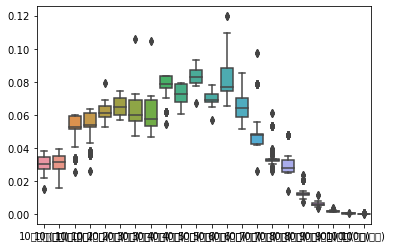

In [62]:
sns.boxplot(data = X[['10대미만(여자)', '10대미만(남자)','10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)',
       '30대(여자)', '30대(남자)', '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)',
       '60대(여자)', '60대(남자)', '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)',
       '90대(여자)', '90대(남자)', '100대(여자)', '100대(남자)']])

In [679]:
iqr = (X['10대'].describe()[6] - X['10대'].describe()[4])* 1.5

X['10대'] = np.where(X['10대'] < (X['10대'].describe()[4] - iqr),
                    (X['10대'].describe()[4] - iqr), X['10대'])
X['10대'] = np.where(X['10대'] > (X['10대'].describe()[6] + iqr),
                    (X['10대'].describe()[6] + iqr),
                    X['10대'])

iqr = (X['30대'].describe()[6] - X['30대'].describe()[4])* 1.5

X['30대'] = np.where(X['30대'] < (X['30대'].describe()[4] - iqr),
                    (X['30대'].describe()[4] - iqr), X['30대'])
X['30대'] = np.where(X['30대'] > (X['30대'].describe()[6] + iqr),
                    (X['30대'].describe()[6] + iqr),
                    X['30대'])


iqr = (X['60대'].describe()[6] - X['60대'].describe()[4])* 1.5

X['60대'] = np.where(X['60대'] < (X['60대'].describe()[4] - iqr),
                    (X['60대'].describe()[4] - iqr), X['60대'])
X['60대'] = np.where(X['60대'] > (X['60대'].describe()[6] + iqr),
                    (X['60대'].describe()[6] + iqr),
                    X['60대'])

iqr = (X['70대'].describe()[6] - X['70대'].describe()[4])* 1.5

X['70대'] = np.where(X['70대'] < (X['70대'].describe()[4] - iqr),
                    (X['70대'].describe()[4] - iqr), X['70대'])
X['70대'] = np.where(X['70대'] > (X['70대'].describe()[6] + iqr),
                    (X['70대'].describe()[6] + iqr),
                    X['70대'])

iqr = (X['80대'].describe()[6] - X['80대'].describe()[4])* 1.5

X['80대'] = np.where(X['80대'] < (X['80대'].describe()[4] - iqr),
                    (X['80대'].describe()[4] - iqr), X['80대'])
X['80대'] = np.where(X['80대'] > (X['80대'].describe()[6] + iqr),
                    (X['80대'].describe()[6] + iqr),
                    X['80대'])

iqr = (X['90대'].describe()[6] - X['90대'].describe()[4])* 1.5

X['90대'] = np.where(X['90대'] < (X['90대'].describe()[4] - iqr),
                    (X['90대'].describe()[4] - iqr), X['90대'])
X['90대'] = np.where(X['90대'] > (X['90대'].describe()[6] + iqr),
                    (X['90대'].describe()[6] + iqr),
                    X['90대'])

iqr = (X['100대'].describe()[6] - X['100대'].describe()[4])* 1.5

X['100대'] = np.where(X['100대'] < (X['100대'].describe()[4] - iqr),
                    (X['100대'].describe()[4] - iqr), X['100대'])
X['100대'] = np.where(X['100대'] > (X['100대'].describe()[6] + iqr),
                    (X['100대'].describe()[6] + iqr),
                    X['100대'])





iqr = (X['10대'].describe()[6] - X['10대'].describe()[4])* 1.5

X['10대'] = np.where(X['10대'] < (X['10대'].describe()[4] - iqr),
                    (X['10대'].describe()[4] - iqr), X['10대'])
X['10대'] = np.where(X['10대'] > (X['10대'].describe()[6] + iqr),
                    (X['10대'].describe()[6] + iqr),
                    X['10대'])

iqr = (X['30대'].describe()[6] - X['30대'].describe()[4])* 1.5

X['30대'] = np.where(X['30대'] < (X['30대'].describe()[4] - iqr),
                    (X['30대'].describe()[4] - iqr), X['30대'])
X['30대'] = np.where(X['30대'] > (X['30대'].describe()[6] + iqr),
                    (X['30대'].describe()[6] + iqr),
                    X['30대'])


iqr = (X['60대'].describe()[6] - X['60대'].describe()[4])* 1.5

X['60대'] = np.where(X['60대'] < (X['60대'].describe()[4] - iqr),
                    (X['60대'].describe()[4] - iqr), X['60대'])
X['60대'] = np.where(X['60대'] > (X['60대'].describe()[6] + iqr),
                    (X['60대'].describe()[6] + iqr),
                    X['60대'])

iqr = (X['70대'].describe()[6] - X['70대'].describe()[4])* 1.5

X['70대'] = np.where(X['70대'] < (X['70대'].describe()[4] - iqr),
                    (X['70대'].describe()[4] - iqr), X['70대'])
X['70대'] = np.where(X['70대'] > (X['70대'].describe()[6] + iqr),
                    (X['70대'].describe()[6] + iqr),
                    X['70대'])

iqr = (X['80대'].describe()[6] - X['80대'].describe()[4])* 1.5

X['80대'] = np.where(X['80대'] < (X['80대'].describe()[4] - iqr),
                    (X['80대'].describe()[4] - iqr), X['80대'])
X['80대'] = np.where(X['80대'] > (X['80대'].describe()[6] + iqr),
                    (X['80대'].describe()[6] + iqr),
                    X['80대'])

iqr = (X['90대'].describe()[6] - X['90대'].describe()[4])* 1.5

X['90대'] = np.where(X['90대'] < (X['90대'].describe()[4] - iqr),
                    (X['90대'].describe()[4] - iqr), X['90대'])
X['90대'] = np.where(X['90대'] > (X['90대'].describe()[6] + iqr),
                    (X['90대'].describe()[6] + iqr),
                    X['90대'])

iqr = (X['100대'].describe()[6] - X['100대'].describe()[4])* 1.5

X['100대'] = np.where(X['100대'] < (X['100대'].describe()[4] - iqr),
                    (X['100대'].describe()[4] - iqr), X['100대'])
X['100대'] = np.where(X['100대'] > (X['100대'].describe()[6] + iqr),
                    (X['100대'].describe()[6] + iqr),
                    X['100대'])

In [680]:
iqr = (X['1인당자동차'].describe()[6] - X['1인당자동차'].describe()[4])* 1.5

X['1인당자동차'] = np.where(X['1인당자동차'] < (X['1인당자동차'].describe()[4] - iqr),
                    (X['1인당자동차'].describe()[4] - iqr), X['1인당자동차'])
X['1인당자동차'] = np.where(X['1인당자동차'] > (X['1인당자동차'].describe()[6] + iqr),
                    (X['1인당자동차'].describe()[6] + iqr),
                    X['1인당자동차'])

In [681]:
X.columns

Index(['단지코드', '총세대수', '아파트세대수', '공가수', '지하철', '버스', '단지내주차면수', '등록차량수',
       '임대건물구분_상가', '초장기세대수_비율', '장기세대수_비율', '단기세대수_비율', '공급유형_exL_비율',
       '공급유형_S_비율', '공급유형_L_비율', '국민임대_비율', '공공임대(50년)_비율', '영구임대_비율',
       '임대상가_비율', '공공임대(10년)_비율', '공공임대(분납)_비율', '장기전세_비율', '공공분양_비율',
       '행복주택_비율', '공공임대(5년)_비율', 'ABEGH_비율', 'A_비율', 'ACEFI_비율', 'D_비율',
       'JKLMNO_비율', '전용면적_10_비율', '전용면적_15_비율', '전용면적_20_비율', '전용면적_25_비율',
       '전용면적_30_비율', '전용면적_35_비율', '전용면적_40_비율', '전용면적_45_비율', '전용면적_50_비율',
       '전용면적_55_비율', '전용면적_60_비율', '전용면적_65_비율', '전용면적_70_비율', '전용면적_75_비율',
       '전용면적_80_비율', '00대', '10대', '20대', '30대', '40대', '50대', '60대', '70대',
       '80대', '90대', '100대', '1인당자동차', '강원도', '경기도', '경상남도', '경상북도', '광주광역시',
       '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도'],
      dtype='object')

<AxesSubplot:>

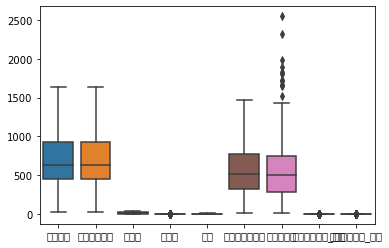

In [682]:
sns.boxplot(data = X.iloc[:,1:10])

In [683]:
X.shape

(411, 73)

In [684]:
X.iloc[:,1:]

,총세대수,아파트세대수,공가수,지하철,버스,단지내주차면수,등록차량수,임대건물구분_상가,초장기세대수_비율,장기세대수_비율,단기세대수_비율,공급유형_exL_비율,공급유형_S_비율,공급유형_L_비율,국민임대_비율,공공임대(50년)_비율,영구임대_비율,임대상가_비율,공공임대(10년)_비율,공공임대(분납)_비율,장기전세_비율,공공분양_비율,행복주택_비율,공공임대(5년)_비율,ABEGH_비율,A_비율,ACEFI_비율,D_비율,JKLMNO_비율,전용면적_10_비율,전용면적_15_비율,전용면적_20_비율,전용면적_25_비율,전용면적_30_비율,전용면적_35_비율,전용면적_40_비율,전용면적_45_비율,전용면적_50_비율,전용면적_55_비율,전용면적_60_비율,전용면적_65_비율,전용면적_70_비율,전용면적_75_비율,전용면적_80_비율,00대,10대,20대,30대,40대,50대,60대,70대,80대,90대,100대,1인당자동차,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
0,545.0,545.0,17.0,0,3.0,624.0,205.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.506422,0.146789,0.000000,0.104587,0.242202,0.000000,0.0,0.0,0.0,0.0,0.0,0.054303,0.108825,0.135538,0.113964,0.144691,0.159442,0.156763,0.081633,0.038655,0.005996,0.000189,0.511963,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1216.0,1216.0,13.0,1,1.0,1285.0,1064.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.320724,0.000000,0.297697,0.279605,0.101974,0.000000,0.0,0.0,0.0,0.0,0.0,0.057289,0.083282,0.125081,0.135501,0.142592,0.154570,0.158728,0.088153,0.046205,0.008234,0.000364,0.456921,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,755.0,755.0,6.0,1,3.0,734.0,730.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.317881,0.000000,0.000000,0.401325,0.280795,0.0,0.0,0.0,0.0,0.0,0.077537,0.106536,0.118378,0.141036,0.161562,0.142203,0.132656,0.075148,0.037490,0.007097,0.000358,0.435486,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,696.0,696.0,14.0,0,2.0,645.0,553.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.364943,0.000000,0.281609,0.353448,0.000000,0.0,0.0,0.0,0.0,0.0,0.057154,0.119765,0.136585,0.098623,0.143650,0.155790,0.144678,0.086773,0.047690,0.009121,0.000171,0.510777,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,566.0,566.0,9.0,0,6.0,517.0,415.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.478799,0.000000,0.369258,0.151943,0.000000,0.0,0.0,0.0,0.0,0.0,0.057154,0.119765,0.136585,0.098623,0.143650,0.155790,0.144678,0.086773,0.047690,0.009121,0.000171,0.510777,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,90.0,90.0,7.0,0,3.0,66.0,57.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.133333,0.0,0.466667,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.071385,0.123174,0.138801,0.098834,0.153078,0.157333,0.129965,0.080998,0.038167,0.007813,0.000450,0.655518,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
407,492.0,492.0,24.0,0,1.0,521.0,246.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.317073,0.000000,0.317073,0.000000,0.365854,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.059569,0.103999,0.123531,0.114142,0.144203,0.159443,0.158437,0.080493,0.046542,0.009305,0.000335,0.507752,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
408,40.0,40.0,7.0,1,2.0,25.0,19.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.500000,0.0,0.125000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.044950,0.080349,0.111030,0.095915,0.122722,0.151754,0.194591,0.091362,0.059278,0.010283,0.000296,0.408684,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
409,90.0,90.0,12.0,0,1.0,30.0,16.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.070017,0.121378,0.125760,0.11769

In [312]:
X.to_csv('0727_try2_data.csv')

## 원핫 처럼 0,1 로 변환시킨 칼럼에서 skew 가 높은데 상관없나?

## 서울은 test set에 없었으니 빼고 진행해도 괜찮을 것 같다

In [685]:
X = X.drop('서울특별시', axis = 1)

In [686]:
X

,단지코드,총세대수,아파트세대수,공가수,지하철,버스,단지내주차면수,등록차량수,임대건물구분_상가,초장기세대수_비율,장기세대수_비율,단기세대수_비율,공급유형_exL_비율,공급유형_S_비율,공급유형_L_비율,국민임대_비율,공공임대(50년)_비율,영구임대_비율,임대상가_비율,공공임대(10년)_비율,공공임대(분납)_비율,장기전세_비율,공공분양_비율,행복주택_비율,공공임대(5년)_비율,ABEGH_비율,A_비율,ACEFI_비율,D_비율,JKLMNO_비율,전용면적_10_비율,전용면적_15_비율,전용면적_20_비율,전용면적_25_비율,전용면적_30_비율,전용면적_35_비율,전용면적_40_비율,전용면적_45_비율,전용면적_50_비율,전용면적_55_비율,전용면적_60_비율,전용면적_65_비율,전용면적_70_비율,전용면적_75_비율,전용면적_80_비율,00대,10대,20대,30대,40대,50대,60대,70대,80대,90대,100대,1인당자동차,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
0,C2515,545.0,545.0,17.0,0,3.0,624.0,205.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.506422,0.146789,0.000000,0.104587,0.242202,0.000000,0.0,0.0,0.0,0.0,0.0,0.054303,0.108825,0.135538,0.113964,0.144691,0.159442,0.156763,0.081633,0.038655,0.005996,0.000189,0.511963,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,C1407,1216.0,1216.0,13.0,1,1.0,1285.0,1064.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.320724,0.000000,0.297697,0.279605,0.101974,0.000000,0.0,0.0,0.0,0.0,0.0,0.057289,0.083282,0.125081,0.135501,0.142592,0.154570,0.158728,0.088153,0.046205,0.008234,0.000364,0.456921,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,C1945,755.0,755.0,6.0,1,3.0,734.0,730.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.317881,0.000000,0.000000,0.401325,0.280795,0.0,0.0,0.0,0.0,0.0,0.077537,0.106536,0.118378,0.141036,0.161562,0.142203,0.132656,0.075148,0.037490,0.007097,0.000358,0.435486,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,C1470,696.0,696.0,14.0,0,2.0,645.0,553.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.364943,0.000000,0.281609,0.353448,0.000000,0.0,0.0,0.0,0.0,0.0,0.057154,0.119765,0.136585,0.098623,0.143650,0.155790,0.144678,0.086773,0.047690,0.009121,0.000171,0.510777,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,C1898,566.0,566.0,9.0,0,6.0,517.0,415.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.478799,0.000000,0.369258,0.151943,0.000000,0.0,0.0,0.0,0.0,0.0,0.057154,0.119765,0.136585,0.098623,0.143650,0.155790,0.144678,0.086773,0.047690,0.009121,0.000171,0.510777,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,C2586,90.0,90.0,7.0,0,3.0,66.0,57.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.133333,0.0,0.466667,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.071385,0.123174,0.138801,0.098834,0.153078,0.157333,0.129965,0.080998,0.038167,0.007813,0.000450,0.655518,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
407,C2035,492.0,492.0,24.0,0,1.0,521.0,246.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.317073,0.000000,0.317073,0.000000,0.365854,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.059569,0.103999,0.123531,0.114142,0.144203,0.159443,0.158437,0.080493,0.046542,0.009305,0.000335,0.507752,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
408,C2020,40.0,40.0,7.0,1,2.0,25.0,19.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.500000,0.0,0.125000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.044950,0.080349,0.111030,0.095915,0.122722,0.151754,0.194591,0.091362,0.059278,0.010283,0.000296,0.408684,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
409,C2437,90.0,90.0,12.0,0,1.0,30.0,16.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0

In [660]:
df2[['단지코드', '등록차량수']]

,단지코드,등록차량수
0,C2515,205.0
1,C1407,1064.0
2,C1945,730.0
3,C1470,553.0
4,C1898,415.0
...,...,...
406,C2586,57.0
407,C2035,246.0
408,C2020,19.0
409,C2437,16.0


In [661]:
y

0       205.0
1      1064.0
2       730.0
3       553.0
4       415.0
        ...  
406      57.0
407     246.0
408      19.0
409      16.0
410     146.0
Name: 등록차량수, Length: 411, dtype: float64

In [663]:
from sklearn.ensemble import VotingRegressor

X1_train, X1_test, y1_train, y1_test = train_test_split(X_tt, y, test_size = 0.25)

reg1 = RandomForestRegressor(random_state=1)
reg2 = ElasticNet(random_state=1)
reg3 = Lasso(random_state=1)
reg4 = GradientBoostingRegressor(random_state=1)
reg5 = XGBRegressor(random_state=1)
reg1.fit(X1_train, y1_train)
reg2.fit(X1_train, y1_train)
reg3.fit(X1_train, y1_train)
reg4.fit(X1_train, y1_train)
reg5.fit(X1_train, y1_train)
ereg1 = VotingRegressor([('rf', reg1), ('en', reg2), ('ls', reg3), ('gb', reg4), ('xg', reg5)])
ereg1.fit(X1_train, y1_train)
    
ereg2 = VotingRegressor([('rf', reg1), ('en', reg2), ('ls', reg3), ('gb', reg4)])
ereg2.fit(X1_train, y1_train)

ereg3 = VotingRegressor([('rf', reg1), ('en', reg2), ('ls', reg3)])
ereg3.fit(X1_train, y1_train)

ereg4 = VotingRegressor([('en', reg2), ('ls', reg3)])
ereg4.fit(X1_train, y1_train)
    
a=[]

a.append(round(mean_absolute_error(y1_test, reg1.predict(X1_test)),3))
a.append(round(mean_absolute_error(y1_test, reg2.predict(X1_test)),3))
a.append(round(mean_absolute_error(y1_test, reg3.predict(X1_test)),3))
a.append(round(mean_absolute_error(y1_test, reg4.predict(X1_test)),3))
a.append(round(mean_absolute_error(y1_test, reg5.predict(X1_test)),3))
a.append(round(mean_absolute_error(y1_test, ereg1.predict(X1_test)),3))

result_models = pd.DataFrame(columns = ['RFR','LASSO','ELASTICNET','GRADIENT','XGB','Voting'])
result_models.loc[len(result_models)] = a



print(round(mean_absolute_error(y1_test, ereg1.predict(X1_test)),3),
      round(mean_absolute_error(y1_test, ereg2.predict(X1_test)),3),
     round(mean_absolute_error(y1_test, ereg3.predict(X1_test)),3),
     round(mean_absolute_error(y1_test, ereg4.predict(X1_test)),3))
result_models

123.491 122.99 121.415 126.627


,RFR,LASSO,ELASTICNET,GRADIENT,XGB,Voting
0,126.78,128.007,131.863,132.902,138.065,123.491


In [315]:
X_t = pd.read_csv('0727_try2_traindata.csv', index_col = 0)

In [318]:
X_t.drop('서울특별시', axis = 1, inplace = True)

In [320]:
for i in range(64):
    if X_t.columns[i] == X.columns[i]:
        pass
    else:
        print(X_t.columns[i], X.columns[i])

In [662]:
import warnings
warnings.simplefilter("ignore")

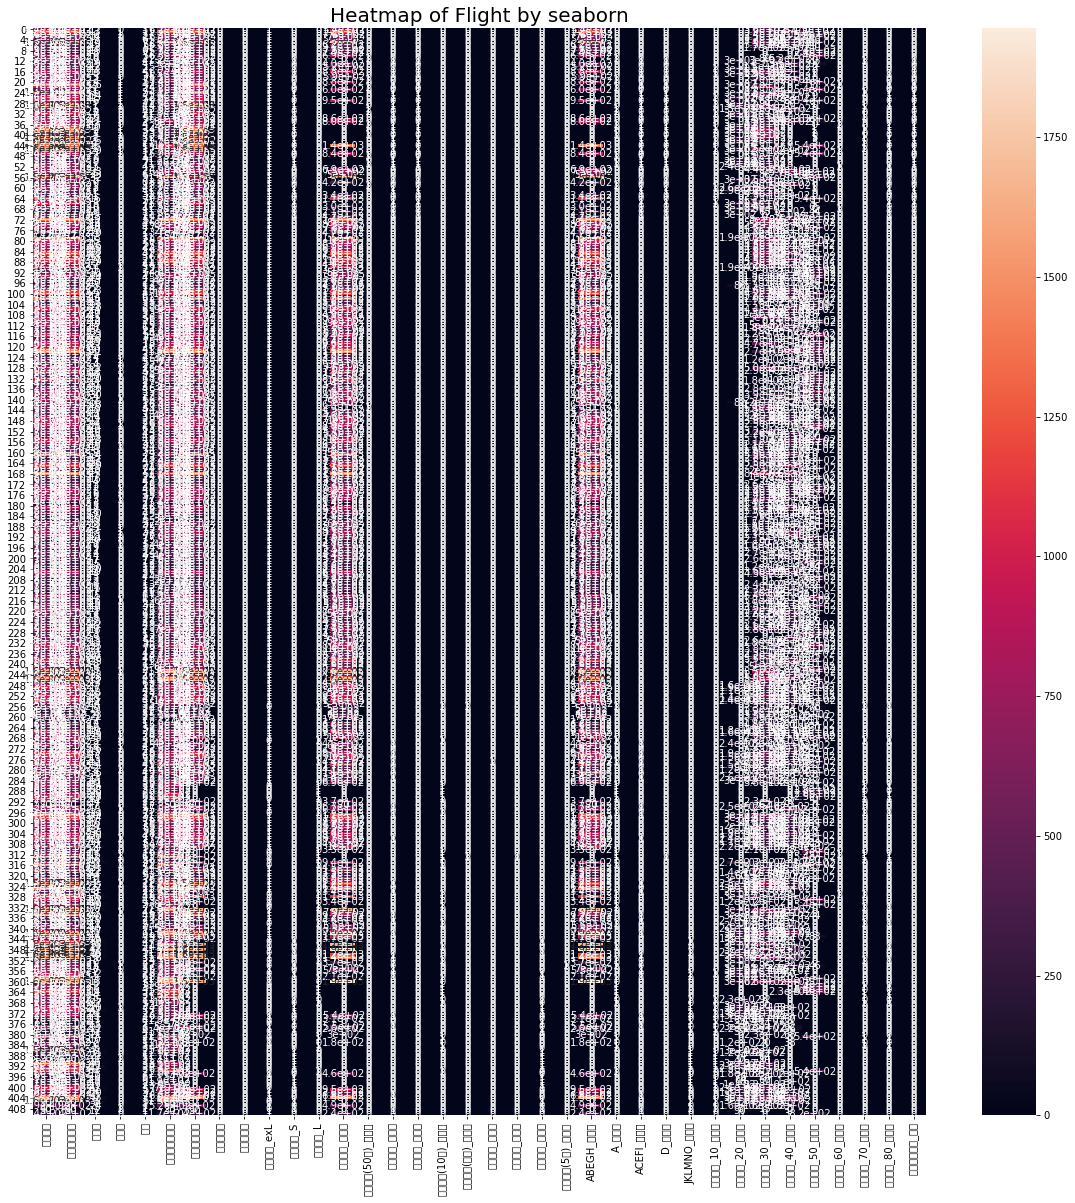

In [95]:
# heatmap by seaborn
plt.figure(figsize = (20,20))
ax = sns.heatmap(X.iloc[:,:36],annot=True)

plt.title('Heatmap of Flight by seaborn', fontsize=20)

plt.show() 

In [325]:
X_tt = X_t.iloc[:,1:-1]

y = X_t['등록차량수']

## Modeling

In [344]:
from sklearn.ensemble import VotingRegressor

X1_train, X1_test, y1_train, y1_test = train_test_split(X_tt, y, test_size = 0.25)

reg1 = RandomForestRegressor(random_state=1)
reg2 = ElasticNet(random_state=1)
reg3 = Lasso(random_state=1)
reg4 = GradientBoostingRegressor(random_state=1)
reg5 = XGBRegressor(random_state=1)
reg1.fit(X1_train, y1_train)
reg2.fit(X1_train, y1_train)
reg3.fit(X1_train, y1_train)
reg4.fit(X1_train, y1_train)
reg5.fit(X1_train, y1_train)
ereg1 = VotingRegressor([('rf', reg1), ('en', reg2), ('ls', reg3), ('gb', reg4), ('xg', reg5)])
ereg1.fit(X1_train, y1_train)
    
ereg2 = VotingRegressor([('rf', reg1), ('en', reg2), ('ls', reg3), ('gb', reg4)])
ereg2.fit(X1_train, y1_train)

ereg3 = VotingRegressor([('rf', reg1), ('en', reg2), ('ls', reg3)])
ereg3.fit(X1_train, y1_train)

ereg4 = VotingRegressor([('en', reg2), ('ls', reg3)])
ereg4.fit(X1_train, y1_train)
    
a=[]

a.append(round(mean_absolute_error(y1_test, reg1.predict(X1_test)),3))
a.append(round(mean_absolute_error(y1_test, reg2.predict(X1_test)),3))
a.append(round(mean_absolute_error(y1_test, reg3.predict(X1_test)),3))
a.append(round(mean_absolute_error(y1_test, reg4.predict(X1_test)),3))
a.append(round(mean_absolute_error(y1_test, reg5.predict(X1_test)),3))
a.append(round(mean_absolute_error(y1_test, ereg1.predict(X1_test)),3))

result_models = pd.DataFrame(columns = ['RFR','LASSO','ELASTICNET','GRADIENT','XGB','Voting'])
result_models.loc[len(result_models)] = a



print(round(mean_absolute_error(y1_test, ereg1.predict(X1_test)),3),
      round(mean_absolute_error(y1_test, ereg2.predict(X1_test)),3),
     round(mean_absolute_error(y1_test, ereg3.predict(X1_test)),3),
     round(mean_absolute_error(y1_test, ereg4.predict(X1_test)),3))
result_models

95.266 94.742 95.291 98.836


,RFR,LASSO,ELASTICNET,GRADIENT,XGB,Voting
0,101.452,95.643,110.533,112.547,124.507,95.266


In [107]:
## 98.125	104.986	123.408	94.652	105.206	86.821
## 이거로 해서 111.9 나옴

In [366]:
round(mean_absolute_error(y1_test, ereg2.predict(X1_test)),3), round(mean_absolute_error(y1_train, ereg2.predict(X1_train)),3)

(94.742, 78.461)

In [367]:
round(mean_absolute_error(y1_test, ereg1.predict(X1_test)),3), round(mean_absolute_error(y1_train, ereg1.predict(X1_train)),3)

(95.266, 62.785)

In [368]:
round(mean_absolute_error(y1_test, ereg3.predict(X1_test)),3), round(mean_absolute_error(y1_train, ereg3.predict(X1_train)),3)

(95.291, 88.344)

In [369]:
round(mean_absolute_error(y1_test, ereg4.predict(X1_test)),3), round(mean_absolute_error(y1_train, ereg4.predict(X1_train)),3)

(98.836, 112.265)

In [113]:
Xx = pd.read_csv('0727_try1.csv', index_col = 0)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


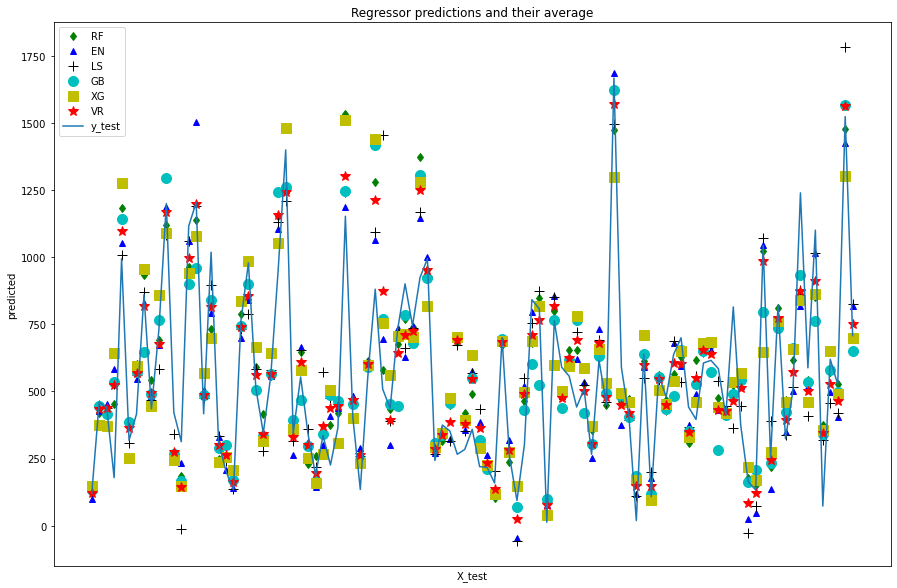

VotingRegressor MAE        :  94.74199956386549
RandomForestRegressor MAE  :  101.45213592233011
ElasticNet MAE             :  95.64281123319327
Lasso MAE                  :  110.53291691886335
GradientBoost MAE          :  112.54721094824698
XGBoost MAE                :  124.50717381597723


In [347]:
pred1 = reg1.predict(X1_test)
pred2 = reg2.predict(X1_test)
pred3 = reg3.predict(X1_test)
pred4 = reg4.predict(X1_test)
pred5 = reg5.predict(X1_test)
pred9 = ereg2.predict(X1_test)

plt.figure(figsize = (15,10))
plt.plot(pred1, 'gd', label='RF')
plt.plot(pred2, 'b^', label='EN')
plt.plot(pred3, 'k+', ms=10, label='LS')
plt.plot(pred4, 'co', ms=10, label='GB')
plt.plot(pred5, 'ys', ms=10, label='XG')

plt.plot(pred9, 'r*', ms=10, label='VR')
plt.plot(y1_test.values, label = 'y_test')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('X_test')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()
print('VotingRegressor MAE        : ',mean_absolute_error(y1_test, pred9))
print('RandomForestRegressor MAE  : ',mean_absolute_error(y1_test, pred1))
print('ElasticNet MAE             : ',mean_absolute_error(y1_test, pred2))
print('Lasso MAE                  : ',mean_absolute_error(y1_test, pred3))
print('GradientBoost MAE          : ',mean_absolute_error(y1_test, pred4))
print('XGBoost MAE                : ',mean_absolute_error(y1_test, pred5))

In [349]:
from sklearn.metrics import r2_score

In [355]:
print(r2_score(y1_test, ereg1.predict(X1_test)),
r2_score(y1_test, ereg2.predict(X1_test)),
r2_score(y1_test, ereg3.predict(X1_test)),
r2_score(y1_test, ereg4.predict(X1_test)))


0.8390368287509158 0.8455126587900885 0.846192612302168 0.827022105074742


In [358]:
ereg2.predict(X.iloc[:,1:])

array([ 703.98149389, 1152.41737538,  492.17217138,  514.3638971 ,
       1120.64163512, 1372.4089037 ,  903.68467332,  383.10702245,
        342.53882422,  278.62439961,  488.94342124,  189.01872053,
        468.68448682,  233.99048376,  103.45248854,  387.56809337,
        527.75849239,  367.65431553,  207.47155011,  637.5209789 ,
        307.34853763,  491.74412823,  513.52192493,  429.6340594 ,
        471.24526994,   99.36229834,  162.19000858,  584.78661261,
        533.584267  ,  524.10737091,  931.07619592,  180.48705628,
        511.31206175,  291.52771067,  172.07250127,  375.79433181,
        458.12795764,  591.13874065,  780.89694777,  281.24247499,
        421.9187894 ,  521.32613541,  380.10576125,  560.36701576,
        794.85685419, 1208.26597987,  470.03607323,  608.0833194 ,
        434.05955119,  329.94732516,  749.43098516,  298.54315555,
       1103.22872425,  726.30662828,  647.008743  ,  241.90193594,
        556.16647264,  284.96483448,  461.8414549 ,  183.47672

In [363]:
pd.DataFrame([X.iloc[:,0],ereg2.predict(X.iloc[:,1:])]).T.to_csv('0727_try2_result.csv')

In [370]:
pd.DataFrame([X.iloc[:,0], ereg3.predict(X.iloc[:,1:])]).T.to_csv('0727_try3_result.csv')

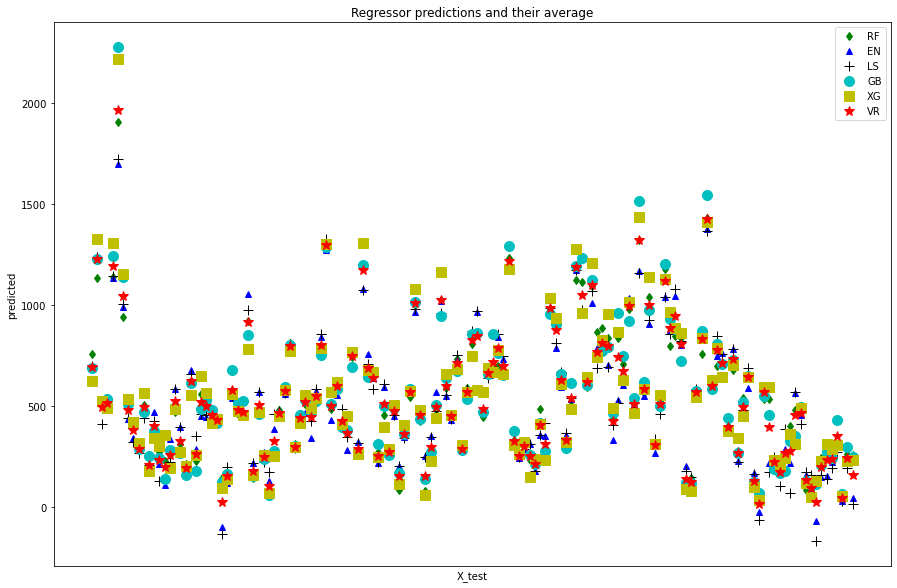

In [58]:
pred1 = reg1.predict(Xx.iloc[:,1:])
pred2 = reg2.predict(Xx.iloc[:,1:])
pred3 = reg3.predict(Xx.iloc[:,1:])
pred4 = reg4.predict(Xx.iloc[:,1:])
pred5 = reg5.predict(Xx.iloc[:,1:])
pred9 = ereg.predict(Xx.iloc[:,1:])

plt.figure(figsize = (15,10))
plt.plot(pred1, 'gd', label='RF')
plt.plot(pred2, 'b^', label='EN')
plt.plot(pred3, 'k+', ms=10, label='LS')
plt.plot(pred4, 'co', ms=10, label='GB')
plt.plot(pred5, 'ys', ms=10, label='XG')

plt.plot(pred9, 'r*', ms=10, label='VR')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('X_test')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

In [59]:
pred9

array([ 691.84289055, 1230.10797507,  494.08231138,  514.97241835,
       1193.12719948, 1965.91209876, 1046.75980527,  481.50759194,
        380.21738383,  287.69973125,  495.93481243,  206.51128804,
        403.05830228,  230.59548375,  195.32111908,  258.08209828,
        523.11768072,  328.24703654,  192.57677768,  624.81598124,
        261.1347116 ,  521.57711898,  500.75323395,  452.97930342,
        432.53218784,   25.81751199,  153.27002687,  581.28051844,
        480.19748727,  471.48547299,  917.17745212,  176.98162959,
        506.10947663,  247.84445019,  102.05158015,  328.4338926 ,
        467.02334915,  573.27354165,  796.82946132,  297.15249879,
        441.93709372,  519.22637319,  443.62371374,  547.50408059,
        803.65745356, 1298.22663741,  499.4363309 ,  598.05734241,
        426.74593995,  367.0826072 ,  746.67091296,  288.41981832,
       1171.34953669,  689.96602607,  640.11381289,  253.65226202,
        511.10407505,  271.29790079,  474.8059511 ,  154.75791

In [212]:
pd.DataFrame((Xx.iloc[:,0],pred9)).T.to_csv('0727_try1_result.csv')

In [60]:
X_train.columns

Index(['총세대수', '아파트세대수', '상가세대수', '공가수', '지하철', '버스', '단지내주차면수', '초장기세대수',
       '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L', '국민임대_세대수',
       '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_20_세대수', '전용면적_30_세대수', '전용면적_40_세대수', '전용면적_50_세대수',
       '전용면적_60_세대수', '전용면적_70_세대수', '전용면적_80_세대수', '임대건물구분_아파트', '임대건물구분_상가',
       '00대', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대',
       '100대', '1인당자동차', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시',
       '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도'],
      dtype='object')

In [74]:
from sklearn.ensemble import VotingRegressor
result_models = pd.DataFrame(columns = ['RFR','LASSO','ELASTICNET','GRADIENT','XGB','Voting'])
reg1 = RandomForestRegressor(random_state=1)
reg2 = ElasticNet(random_state=1)
reg3 = Lasso(random_state=1)
reg4 = GradientBoostingRegressor(random_state=1)
reg5 = XGBRegressor(random_state=1)

for i in range(0,50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    reg1.fit(X_train, y_train)
    reg2.fit(X_train, y_train)
    reg3.fit(X_train, y_train)
    reg4.fit(X_train, y_train)
    reg5.fit(X_train, y_train)

    ereg = VotingRegressor([('rf', reg1), ('en', reg2), ('ls', reg3), ('gb', reg4), ('xg', reg5)])
    ereg.fit(X_train, y_train)
    
    a=[]

    a.append(round(mean_absolute_error(y_test, reg1.predict(X_test)),3))
    a.append(round(mean_absolute_error(y_test, reg2.predict(X_test)),3))
    a.append(round(mean_absolute_error(y_test, reg3.predict(X_test)),3))
    a.append(round(mean_absolute_error(y_test, reg4.predict(X_test)),3))
    a.append(round(mean_absolute_error(y_test, reg5.predict(X_test)),3))
    a.append(round(mean_absolute_error(y_test, ereg.predict(X_test)),3))


    result_models.loc[len(result_models)] = a
result_models.mean()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2472021.936928062, tolerance: 4211.393582792208
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1993569.182705678, tolerance: 4211.393582792208
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

RFR           122.47990
LASSO         119.45520
ELASTICNET    119.15236
GRADIENT      123.62520
XGB           132.46650
Voting        114.14094
dtype: float64

In [76]:
result_models

,RFR,LASSO,ELASTICNET,GRADIENT,XGB,Voting
0,142.804,123.817,121.178,141.970,164.796,130.917
1,130.628,120.583,115.946,132.325,146.198,122.680
2,120.687,120.709,119.325,125.707,131.746,115.590
3,124.360,137.123,146.871,119.105,125.491,112.163
4,130.866,126.150,147.918,139.308,147.841,116.302
5,124.280,107.986,104.439,122.032,132.283,111.168
6,116.671,123.827,120.918,118.677,132.888,109.495
7,121.167,122.958,117.563,114.397,132.231,112.316
8,117.652,110.035,108.826,112.856,125.210,109.775
9,113.970,108.048,110.501,113.402,129.738,106.779


In [115]:
from sklearn.metrics import r2_score

In [116]:
def fit_rfr_reg(X_train, X_test, y_train, y_test):
    # fit RandomForest regression model and return MAE and R squared values
    model_k = RandomForestRegressor()
    model_k.fit(X_train,y_train.values.ravel())
    MAE = mean_absolute_error(y_test, model_k.predict(X_test))
    R_squared = r2_score(y_test, model_k.predict(X_test))
    return MAE, R_squared

In [117]:
from tqdm import tnrange, tqdm_notebook
import itertools

In [ ]:
k = 64
MAE_list, R_squared_list, feature_list = [], [], []
numb_features = []



for k in tqdm_notebook(range(64, 54, -1), desc = 'Loop...'):
    counter = k
    counter1 = 1
    for combo in itertools.combinations(X.columns, k):
        tmp_result = fit_rfr_reg(X_train[list(combo)],X_test[list(combo)], y_train, y_test)
        MAE_list.append(tmp_result[0])
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))
        print(counter, counter1)
        counter1 += 1

        
df = pd.DataFrame({'numb_features':numb_features,
                  'MAE':MAE_list,
                  'R_squared':R_squared_list,
                  'features':feature_list})

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


Loop...:   0%|          | 0/10 [00:00<?, ?it/s]

64 1
63 1
63 2
63 3
63 4
63 5
63 6
63 7
63 8
63 9
63 10
63 11
63 12
63 13
63 14
63 15
63 16
63 17
63 18
63 19
63 20
63 21
63 22
63 23
63 24
63 25
63 26
63 27
63 28
63 29
63 30
63 31
63 32
63 33
63 34
63 35
63 36
63 37
63 38
63 39
63 40
63 41
63 42
63 43
63 44
63 45
63 46
63 47
63 48
63 49
63 50
63 51
63 52
63 53
63 54
63 55
63 56
63 57
63 58
63 59
63 60
63 61
63 62
63 63
63 64
62 1
62 2
62 3
62 4
62 5
62 6
62 7
62 8
62 9
62 10
62 11
62 12
62 13
62 14
62 15
62 16
62 17
62 18
62 19
62 20
62 21
62 22
62 23
62 24
62 25
62 26
62 27
62 28
62 29
62 30
62 31
62 32
62 33
62 34
62 35
62 36
62 37
62 38
62 39
62 40
62 41
62 42
62 43
62 44
62 45
62 46
62 47
62 48
62 49
62 50
62 51
62 52
62 53
62 54
62 55
62 56
62 57
62 58
62 59
62 60
62 61
62 62
62 63
62 64
62 65
62 66
62 67
62 68
62 69
62 70
62 71
62 72
62 73
62 74
62 75
62 76
62 77
62 78
62 79
62 80
62 81
62 82
62 83
62 84
62 85
62 86
62 87
62 88
62 89
62 90
62 91
62 92
62 93
62 94
62 95
62 96
62 97
62 98
62 99
62 100
62 101
62 102
62 103
62 104


In [ ]:
df_min = df[df.groupby('numb_features')['MAE'].transform(min) == df['MAE']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(5))
display(df_max.head(5))

In [ ]:
df['min_MAE'] = df.groupby('numb_features')['MAE'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()

In [ ]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('MAE')
ax.set_title('MAE - Best subset selection')
ax.plot(df.numb_features,df.min_MAE,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

In [371]:
X

,단지코드,총세대수,아파트세대수,공가수,지하철,버스,단지내주차면수,초장기세대수,장기세대수,단기세대수,공급유형_exL,공급유형_S,공급유형_L,국민임대_세대수,공공임대(50년)_세대수,영구임대_세대수,임대상가_세대수,공공임대(10년)_세대수,공공임대(분납)_세대수,장기전세_세대수,공공분양_세대수,행복주택_세대수,공공임대(5년)_세대수,ABEGH_세대수,A_세대수,ACEFI_세대수,D_세대수,JKLMNO_세대수,전용면적_10_세대수,전용면적_20_세대수,전용면적_30_세대수,전용면적_40_세대수,전용면적_50_세대수,전용면적_60_세대수,전용면적_70_세대수,전용면적_80_세대수,임대건물구분_상가,00대,10대,20대,30대,40대,50대,60대,70대,80대,90대,100대,1인당자동차,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
0,C1072,754.0,754.0,14.0,0,2.0,683.0,754.0,0.0,0.0,1.0,0.0,0.0,754.0,0,0,0,0,0,0,0,0,0,754.0,0,0,0,0,0,0.00,116.0,262.0,376.0,0,0,0,0,0.077537,0.106536,0.118378,0.141036,0.161562,0.142203,0.132656,0.075148,0.037490,0.007097,0.000358,0.435486,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,C1128,1354.0,1354.0,9.0,0,3.0,1216.0,1354.0,0.0,0.0,1.0,0.0,0.0,1354.0,0,0,0,0,0,0,0,0,0,1354.0,0,0,0,0,0,0.00,420.0,356.0,578.0,0,0,0,0,0.077537,0.106536,0.118378,0.141036,0.161562,0.142203,0.132656,0.075148,0.037490,0.007097,0.000358,0.435486,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,C1456,619.0,619.0,18.0,0,7.0,547.0,619.0,0.0,0.0,1.0,0.0,0.0,619.0,0,0,0,0,0,0,0,0,0,619.0,0,0,0,0,0,0.00,247.0,196.0,176.0,0,0,0,0,0.044950,0.083438,0.111030,0.095915,0.122722,0.151754,0.194591,0.091362,0.054871,0.009490,0.000296,0.408684,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,C1840,593.0,593.0,7.0,0,3.0,543.0,593.0,0.0,0.0,1.0,0.0,0.0,593.0,0,0,0,0,0,0,0,0,0,593.0,0,0,0,0,0,0.00,335.0,174.0,84.0,0,0,0,0,0.057154,0.119765,0.136585,0.098623,0.143650,0.155790,0.144678,0.086773,0.047690,0.009121,0.000171,0.510777,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,C1332,1297.0,1297.0,11.0,0,2.0,1112.0,1297.0,0.0,0.0,1.0,0.0,0.0,1297.0,0,0,0,0,0,0,0,0,0,1297.0,0,0,0,0,0,0.00,425.0,568.0,304.0,0,0,0,0,0.077537,0.106536,0.118378,0.141036,0.161562,0.142203,0.132656,0.075148,0.037490,0.007097,0.000358,0.435486,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,C2456,349.0,349.0,17.0,0,4.0,270.0,346.0,0.0,0.0,1.0,0.0,0.0,346.0,0,0,0,0,0,0,0,0,0,346.0,0,0,0,0,0,112.00,138.0,96.0,0.0,0,0,0,0,0.071385,0.123174,0.138801,0.098834,0.153078,0.157333,0.129965,0.080998,0.038167,0.007813,0.000450,0.641098,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
143,C1266,596.0,596.0,35.0,0,1.0,593.0,591.0,0.0,0.0,1.0,0.0,0.0,591.0,0,0,0,0,0,0,0,0,0,591.0,0,0,0,0,0,180.00,304.0,107.0,0.0,0,0,0,0,0.070017,0.121378,0.125760,0.117694,0.154967,0.157023,0.137817,0.069380,0.038974,0.006696,0.000294,0.523499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
144,C2152,120.0,120.0,9.0,0,1.0,40.0,120.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0.0,0,1,0,0,0,66.00,54.0,0.0,0.0,0,0,0,0,0.059569,0.103999,0.123531,0.114142,0.144203,0.159443,0.158437,0.080493,0.046542,0.009305,0.000335,0.507752,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145,C1267,675.0,675.0,38.0,0,1.0,467.0,420.0,0.0,0.0,1.0,1.0,0.0,310.0,0,1,0,0,0,0,0,1,0,310.0,0,1,0,1,1,193.75,126.0,180.0,0.0,0,0,0,0,0.054303,0.108825,0.135538,0.113964,0.144691,0.159442,0.156763,0.081633,0.038655,0.005996,0.000189,0.511963,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [378]:
col_names = X.columns

In [396]:
X.columns = col_names

In [382]:
from sklearn.metrics import r2_score

In [383]:
def fit_rfr_reg(X_train, X_test, y_train, y_test):
    # fit RandomForest regression model and return MAE and R squared values
    model_k = RandomForestRegressor()
    model_k.fit(X_train,y_train.values.ravel())
    MAE = mean_absolute_error(y_test, model_k.predict(X_test))
    R_squared = r2_score(y_test, model_k.predict(X_test))
    return MAE, R_squared

In [384]:
from tqdm import tnrange, tqdm_notebook
import itertools

In [392]:
a = [2,1,6,4]

In [393]:
a.sort()

In [397]:
k = 64
MAE_list, R_squared_list, feature_list = [], [], []
numb_features = []

history = []

for k in tqdm_notebook(range(64, 54, -1), desc = 'Loop...'):
    counter = k
    counter1 = 1
    for combo in itertools.combinations(X.columns, k):
        a = list(combo)
        a.sort()
        if a not in history:
            history.append(a)
            tmp_result = fit_rfr_reg(X_train[list(combo)],X_test[list(combo)], y_train, y_test)
            MAE_list.append(tmp_result[0])
            R_squared_list.append(tmp_result[1])
            feature_list.append(combo)
            numb_features.append(len(combo))
            print(counter, counter1)
            counter1 += 1
        else:
            pass

        
df = pd.DataFrame({'numb_features':numb_features,
                  'MAE':MAE_list,
                  'R_squared':R_squared_list,
                  'features':feature_list})

Loop...:   0%|          | 0/10 [00:00<?, ?it/s]

NameError: name 'X_train' is not defined

In [ ]:
C2335
C1327
C2497
C2675


In [245]:
B = pd.read_csv('test.csv')

In [246]:
B.loc[(B.단지코드 == 'C2235') | (B.단지코드 == 'C1327') | (B.단지코드 == 'C2497') | (B.단지코드 == 'C2675')]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
579,C2675,512,아파트,경기도,국민임대,36.65,130,9.0,A,18476000,154790,0.0,3.0,1016.0
580,C2675,512,아파트,경기도,국민임대,46.90,44,9.0,A,34082000,232200,0.0,3.0,1016.0
581,C2675,512,아파트,경기도,국민임대,46.90,80,9.0,A,34082000,232200,0.0,3.0,1016.0
582,C2675,512,아파트,경기도,국민임대,46.90,50,9.0,A,34082000,232200,0.0,3.0,1016.0
583,C2675,512,아파트,경기도,국민임대,46.90,88,9.0,A,34082000,232200,0.0,3.0,1016.0
584,C2675,512,아파트,경기도,국민임대,47.40,30,9.0,A,34082000,232200,0.0,3.0,1016.0
585,C2675,512,아파트,경기도,국민임대,51.93,75,9.0,A,43819000,275900,0.0,3.0,1016.0
586,C2675,512,아파트,경기도,국민임대,51.93,15,9.0,A,43819000,275900,0.0,3.0,1016.0
729,C2497,488,아파트,경상북도,공공임대(10년),59.95,89,37.0,A,31000000,416000,0.0,6.0,624.0
730,C2497,488,아파트,경상북도,공공임대(10년),59.99,41,37.0,A,31000000,416000,0.0,6.0,624.0


In [250]:
df1.등록차량수.sum() / df1.총세대수.sum()

0.7694350148408776

In [251]:
df1.등록차량수.sum() / df1.단지내주차면수.sum()

0.96134244338447